# COVID-19 analysis

- <https://github.com/Kamaropoulos/covid19py>

Note that the JHU data source is not providing recovery data at this time ([reference](https://github.com/ExpDev07/coronavirus-tracker-api/blob/master/README.md#recovered-cases-showing-0)).

Another source of data might be the following: <https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data>

## data sources (acquired reliably from CERN)

```Bash
mkdir COVID19
cd COVID19
virtualenv -p python3.6 COVID19
source COVID19/bin/activate
pip3.6 install pip --upgrade
pip3.6 install jupyter matplotlib numpy pandas requests seaborn
pip3.6 install COVID19Py
python3.6
```

```Python
import COVID19Py
import numpy as np
import pandas as pd

import json
import pickle
from uuid import uuid4

def uuid4_short():
    return str(uuid4()).split('-')[0]

def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose:
        print(filename)
    return filename

covid19 = COVID19Py.COVID19()
data = covid19.getAll(timelines=True)

with open(new_filename(), 'wb') as f:
    pickle.dump(data, f)
```

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import COVID19Py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
def uuid4_short():
    return str(uuid4()).split('-')[0]
def new_filename(ext='.pkl', verbose=True):
    filename = uuid4_short()+ext
    if verbose: print(filename)
    return filename

In [4]:
%%time
if 0:
    covid19 = COVID19Py.COVID19(data_source='jhu') # https://github.com/CSSEGISandData/COVID-19
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)
    data = covid19.getAll(timelines=True)
    with open(new_filename(), 'wb') as f:
        pickle.dump(data, f)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [5]:
if 1:
    #with open('12338731.pkl', 'rb') as f:
    #    covid19 = pickle.load(f)
    with open('2fa5652b.pkl', 'rb') as f:
        data = pickle.load(f)
    # records:
    # 2020-06-22T1249Z data: 2fa5652b.pkl
    # 2020-06-20T0529Z data: 30a2be6c.pkl
    # 2020-06-03T0604Z data: 3349596c.pkl
    # 2020-05-30T0158Z data: 74ef0466.pkl
    # 2020-05-25T0106Z data: a7180674.pkl
    # 2020-05-18T1412Z data: 411d8cc3.pkl
    # 2020-05-11T1410Z data: 6d5e6f10.pkl
    # 2020-05-03T1505Z data: b3e37289.pkl
    # 2020-04-30T1228Z data: e755d4a0.pkl
    # 2020-04-27T1146Z data: 9986b353.pkl
    # 2020-04-25T0122Z data: edd11ae3.pkl
    # 2020-04-23T1127Z data: d3284a31.pkl
    # 2020-04-19T1002Z data: c3733293.pkl
    # 2020-04-18T0918Z data: 289efaac.pkl
    # 2020-04-17T0818Z data: 13921a54.pkl
    # 2020-04-16T0745Z data: a0c99473.pkl
    # 2020-04-14T0844Z data: ad724da4.pkl
    # 2020-04-13T2005Z data: 65882db6.pkl
    # 2020-04-12T0527z data: d5fb657f.pkl
    # 2020-04-11T2322Z data: 2ed0a4f8.pkl
    # 2020-04-10T1904Z data: 7a48429f.pkl
    # 2020-04-09T0544Z data: 5f3d2ff9.pkl
    # 2020-04-08T0616Z data: 741cd4d4.pkl
    # 2020-04-07       data: 120141ce.pkl

#latest = covid19.getLatest()
#locations = covid19.getLocations(timelines=True)

df = pd.DataFrame(data['locations'])
df.head()
#df

id      country country_code  country_population province  \
0   0  Afghanistan           AF          37172386.0            
1   1      Albania           AL           2866376.0            
2   2      Algeria           DZ          42228429.0            
3   3      Andorra           AD             77006.0            
4   4       Angola           AO          30809762.0            

                  last_updated  \
0  2020-06-22T12:19:31.917889Z   
1  2020-06-22T12:19:31.936126Z   
2  2020-06-22T12:19:31.947347Z   
3  2020-06-22T12:19:31.955083Z   
4  2020-06-22T12:19:31.962405Z   

                                        coordinates  \
0         {'latitude': '33.0', 'longitude': '65.0'}   
1   {'latitude': '41.1533', 'longitude': '20.1683'}   
2    {'latitude': '28.0339', 'longitude': '1.6596'}   
3    {'latitude': '42.5063', 'longitude': '1.5218'}   
4  {'latitude': '-11.2027', 'longitude': '17.8739'}   

                                              latest  \
0  {'confirmed': 28833, 'deaths': 581, 'recovered...   
1  {'confirmed': 1962, 'deaths': 44, 'recovered': 0}   
2  {'confirmed': 11771, 'deaths': 845, 'recovered...   
3   {'confirmed': 855, 'deaths': 52, 'recovered': 0}   
4    {'confirmed': 183, 'deaths': 9, 'recovered': 0}   

                                           timelines  
0  {'confirmed': {'latest': 28833, 'timeline': {'...  
1  {'confirmed': {'latest': 1962, 'timeline': {'2...  
2  {'confirmed': {'latest': 11771, 'timeline': {'...  
3  {'confirmed': {'latest': 855, 'timeline': {'20...  
4  {'confirmed': {'latest': 183, 'timeline': {'20...

In [6]:
print(list(dict.fromkeys(list(df['country'].values))))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan'

In [7]:
locations = {}

def process(location):
    location = location['timelines'].values[0]

    confirmed = pd.DataFrame(list(location['confirmed']['timeline'].items()), columns=['datetime', 'confirmed'])
    deaths    = pd.DataFrame(list(location['deaths']['timeline'].items()),    columns=['datetime', 'deaths'])
    recovered = pd.DataFrame(list(location['recovered']['timeline'].items()), columns=['datetime', 'recovered'])

    confirmed.index = pd.to_datetime(confirmed['datetime']); del confirmed['datetime']
    deaths.index    = pd.to_datetime(deaths['datetime'])   ; del deaths['datetime']
    recovered.index = pd.to_datetime(recovered['datetime']); del recovered['datetime']

    # merge
    location = confirmed
    location['deaths']       = deaths['deaths']
    location['recovered']    = recovered['recovered']

    # visual estimate of changes (with linear interpolation)
    half_mean_of_confirmed_cases = location['confirmed'].mean()/2
    half_mean_of_deaths_cases    = location['deaths'].mean()/2
    location['confirmed_percentage_change']                                     = location['confirmed'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['confirmed_percentage_change']                                     = 100*location['confirmed_percentage_change']
    location['confirmed_percentage_change_by_half_mean_confirmed_cases_factor'] = half_mean_of_confirmed_cases*location['confirmed_percentage_change']
    location['deaths_percentage_change']                                        = location['deaths'].pct_change().replace(0, np.nan).interpolate(method='nearest')
    location['deaths_percentage_change']                                        = 100*location['deaths_percentage_change']
    location['deaths_percentage_change_by_half_mean_deaths_cases_factor']       = half_mean_of_confirmed_cases*location['deaths_percentage_change']    

    _location = location
    _location = _location.diff(axis=1)
    location['confirmed_new_cases']  = location['confirmed'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')
    location['deaths_new_cases']     = location['deaths'].diff(periods=1).replace(0, np.nan).interpolate(method='nearest').interpolate(method='nearest')

    # reindex to first confirmed case
    location = location.query('confirmed > 0').reset_index(); del location['datetime']

    display(location.tail())

    #plots
    df_plot = location.drop([
        'confirmed_percentage_change',
        'confirmed_percentage_change_by_half_mean_confirmed_cases_factor',
        'deaths_percentage_change',
        'deaths_percentage_change_by_half_mean_deaths_cases_factor'], axis=1)
    df_plot.plot(title=location_name+' confirmed cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))                   ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
    df_plot.plot(title=location_name+' confirmed cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))           ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

    df_plot = location[['confirmed_percentage_change', 'deaths_percentage_change']]
    df_plot.plot(title=location_name+' percentage change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
    df_plot.plot(title=location_name+' percentage change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

    df_plot = location[['confirmed_new_cases', 'deaths_new_cases']]
    df_plot.plot(title=location_name+' change in cases and deaths (linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');
    df_plot.plot(title=location_name+' change in cases and deaths (log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('new cases');

    return location

# South Korea

confirmed  deaths recovered  confirmed_percentage_change  \
147      12257     280       NaN                     0.483686   
148      12306     280       NaN                     0.399772   
149      12373     280       NaN                     0.544450   
150      12421     280       NaN                     0.387941   
151      12438     280       NaN                     0.136865   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
147                                        1857.286840                 
148                                        1535.067555                 
149                                        2090.612249                 
150                                        1489.641707                 
151                                         525.542640                 

     deaths_percentage_change  \
147                  0.358423   
148                       NaN   
149                       NaN   
150                       NaN   
151                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
147                                        1376.294567           
148                                                NaN           
149                                                NaN           
150                                                NaN           
151                                                NaN           

     confirmed_new_cases  deaths_new_cases  
147                 59.0               1.0  
148                 49.0               NaN  
149                 67.0               NaN  
150                 48.0               NaN  
151                 17.0               NaN

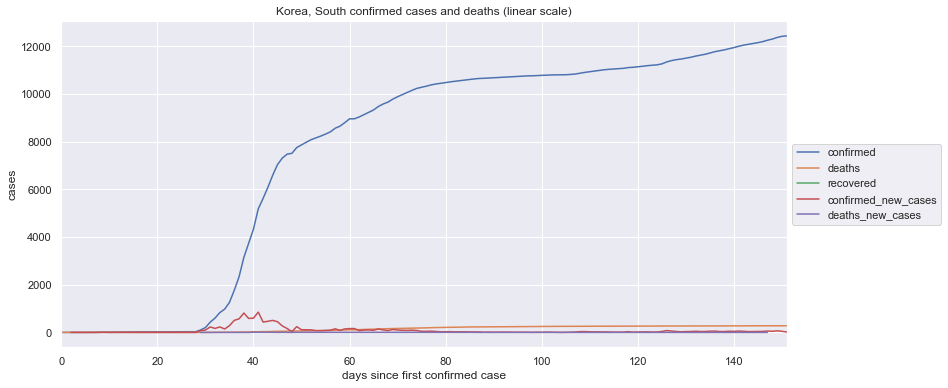

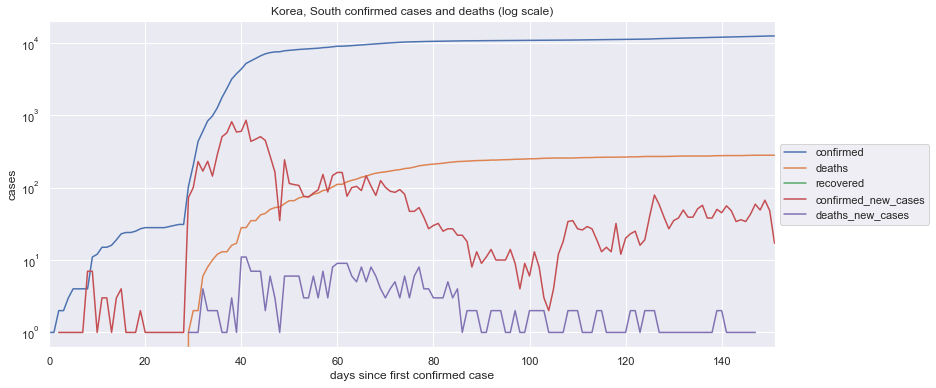

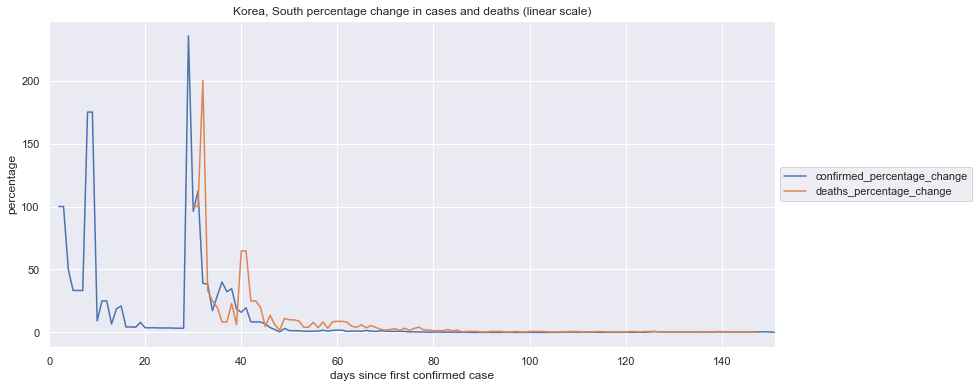

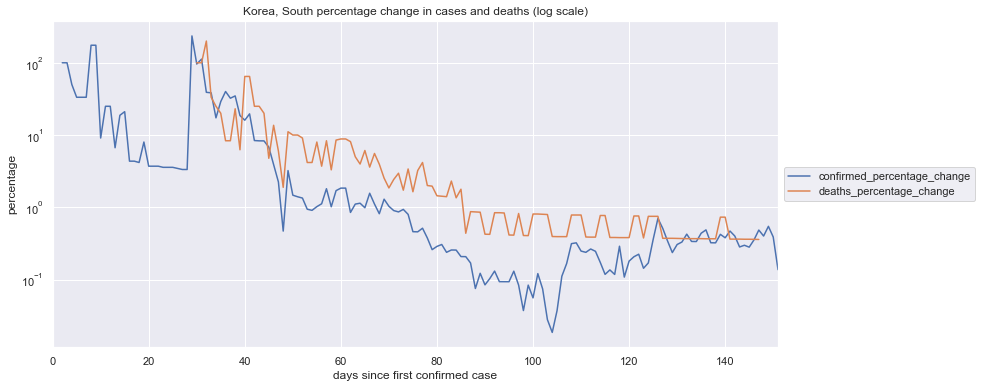

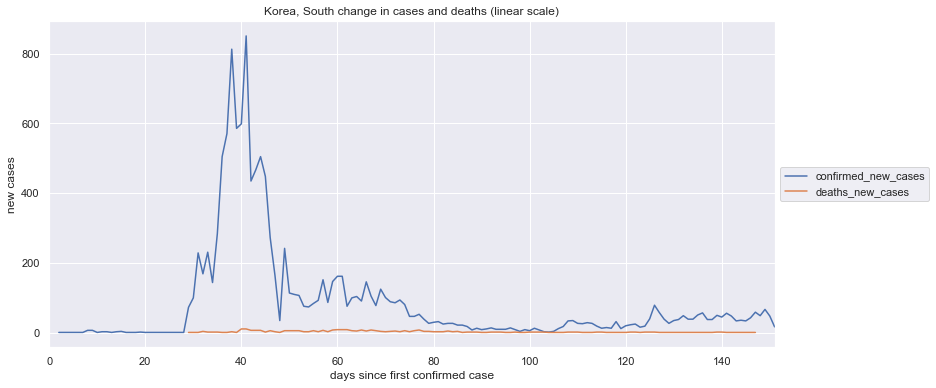

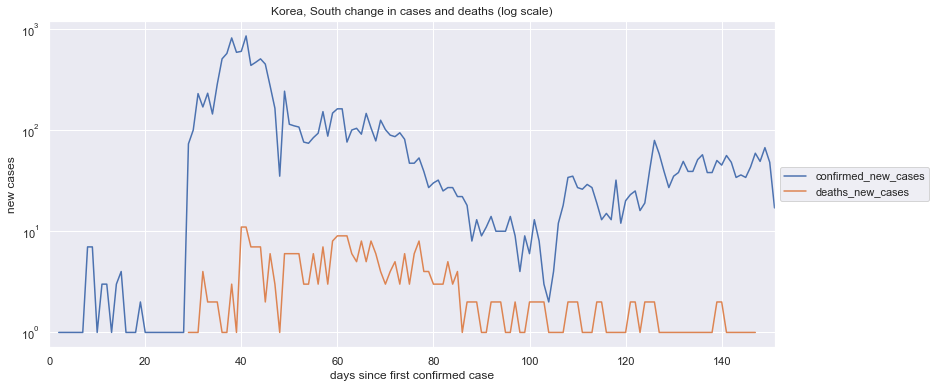

In [8]:
location_name = 'Korea, South'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Belgium

confirmed  deaths recovered  confirmed_percentage_change  \
134      60244    9675       NaN                     0.147951   
135      60348    9683       NaN                     0.172631   
136      60476    9695       NaN                     0.212103   
137      60550    9696       NaN                     0.122363   
138      60550    9696       NaN                          NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
134                                        1957.952111                 
135                                        2284.564001                 
136                                        2806.925446                 
137                                        1619.319147                 
138                                                NaN                 

     deaths_percentage_change  \
134                  0.124185   
135                  0.082687   
136                  0.123929   
137                  0.010315   
138                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
134                                        1643.436984           
135                                        1094.265742           
136                                        1640.042505           
137                                         136.501045           
138                                                NaN           

     confirmed_new_cases  deaths_new_cases  
134                 89.0              12.0  
135                104.0               8.0  
136                128.0              12.0  
137                 74.0               1.0  
138                  NaN               NaN

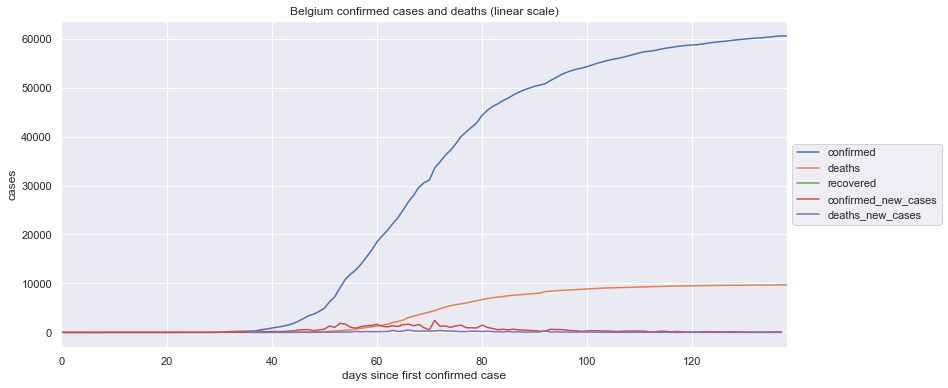

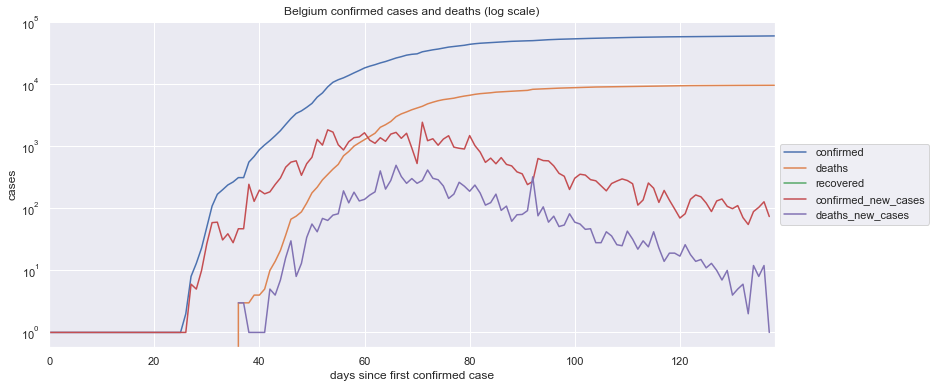

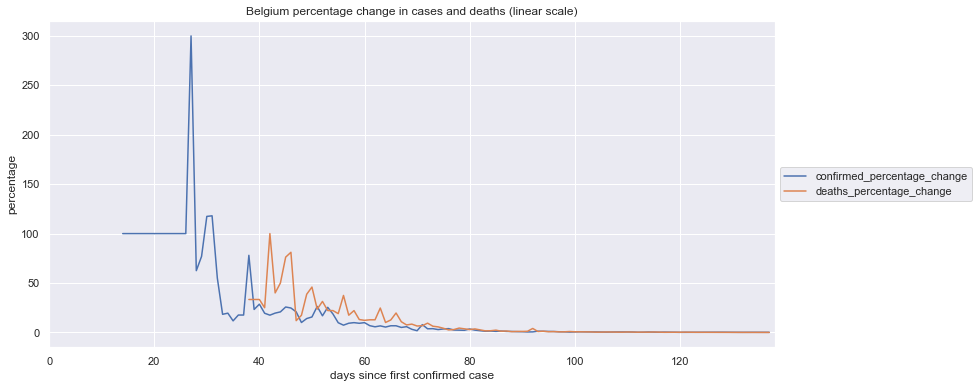

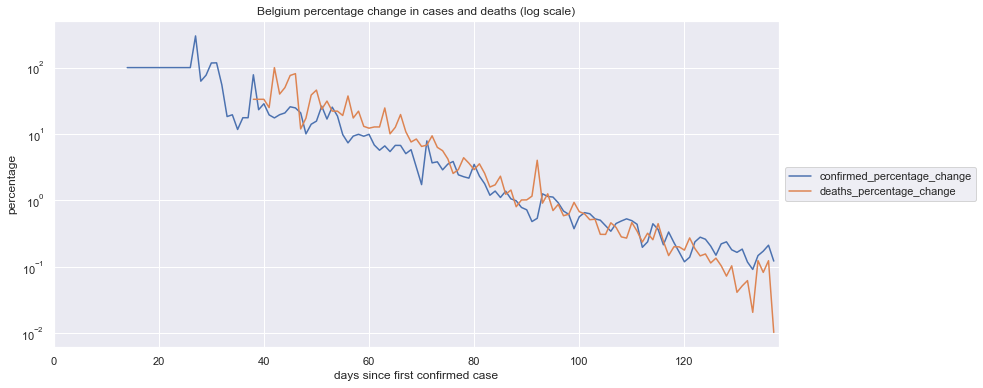

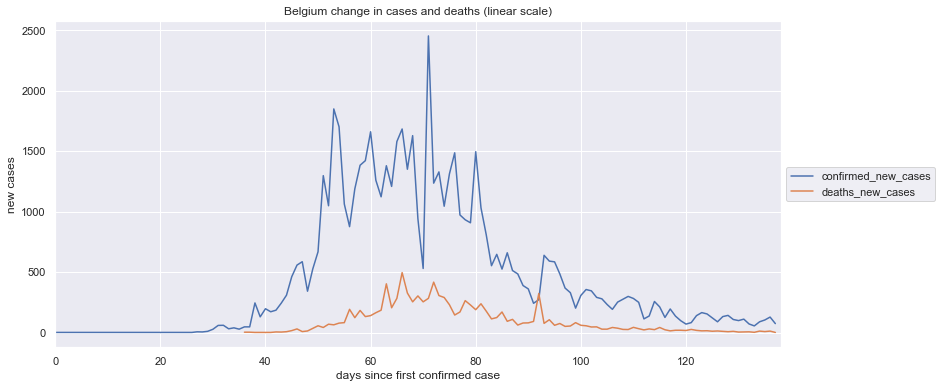

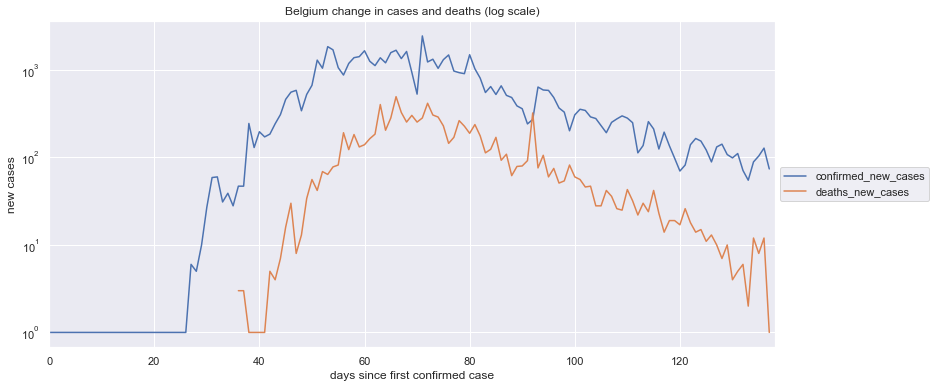

In [9]:
location_name = 'Belgium'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Switzerland

confirmed  deaths recovered  confirmed_percentage_change  \
113      31187    1956       NaN                     0.105925   
114      31200    1956       NaN                     0.041684   
115      31235    1956       NaN                     0.112179   
116      31243    1956       NaN                     0.025612   
117      31292    1956       NaN                     0.156835   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
113                                         877.759910                 
114                                         345.418321                 
115                                         929.584915                 
116                                         212.238464                 
117                                        1299.627727                 

     deaths_percentage_change  \
113                  0.102354   
114                       NaN   
115                       NaN   
116                       NaN   
117                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
113                                         848.166379           
114                                                NaN           
115                                                NaN           
116                                                NaN           
117                                                NaN           

     confirmed_new_cases  deaths_new_cases  
113                 33.0               2.0  
114                 13.0               NaN  
115                 35.0               NaN  
116                  8.0               NaN  
117                 49.0               NaN

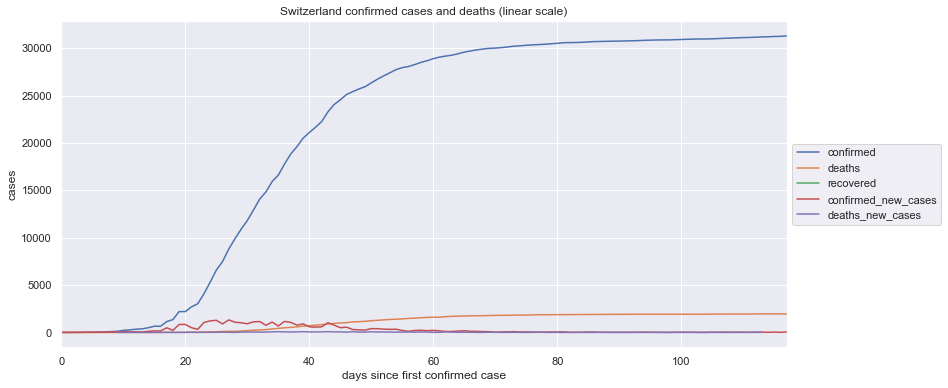

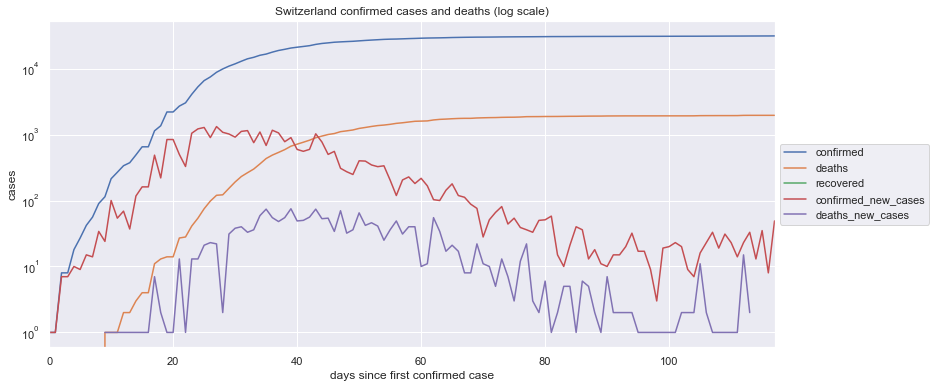

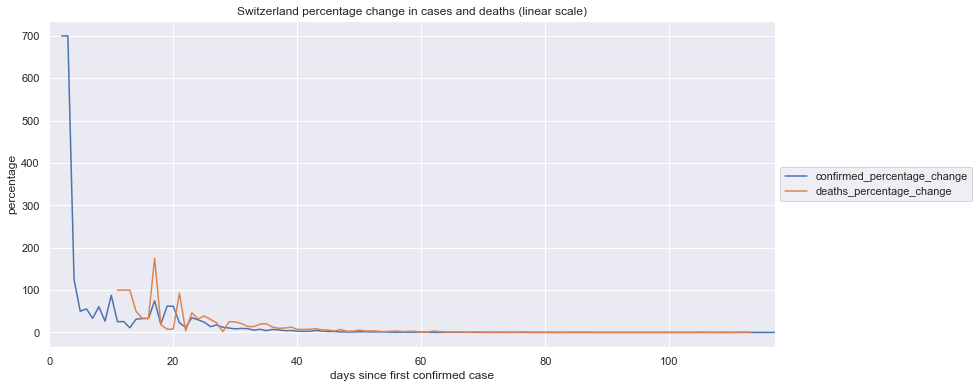

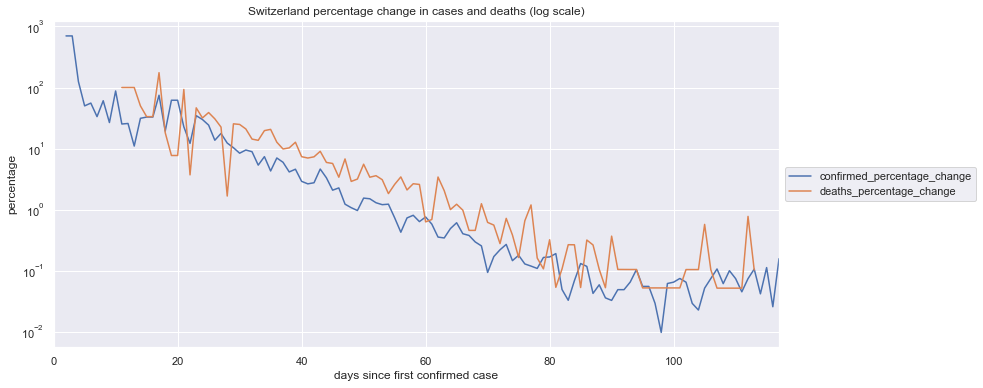

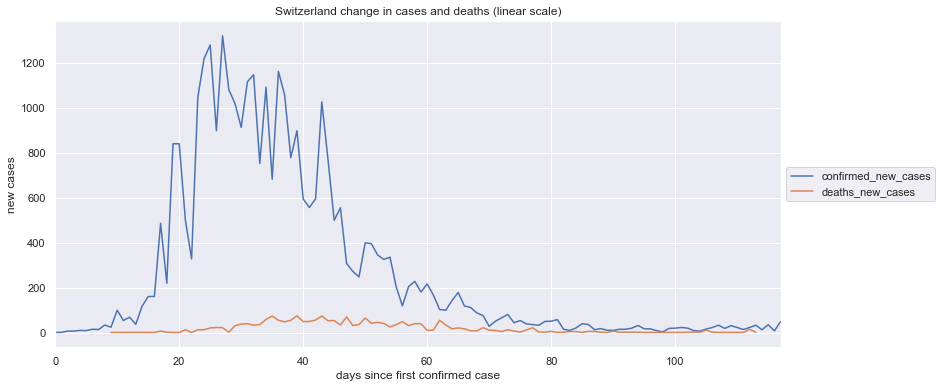

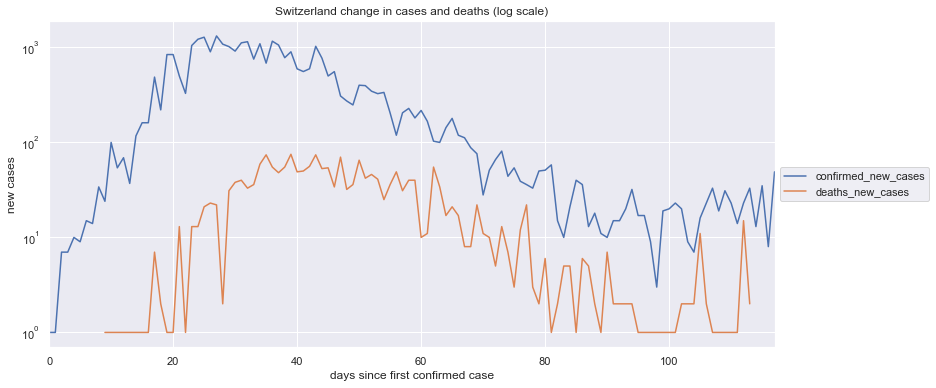

In [10]:
location_name = 'Switzerland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Greece

confirmed  deaths recovered  confirmed_percentage_change  \
112       3203     187       NaN                     1.747141   
113       3227     188       NaN                     0.749298   
114       3237     189       NaN                     0.309885   
115       3256     190       NaN                     0.586963   
116       3266     190       NaN                     0.307125   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
112                                        1315.373065                 
113                                         564.124916                 
114                                         233.303908                 
115                                         441.908017                 
116                                         231.225955                 

     deaths_percentage_change  \
112                  1.081081   
113                  0.534759   
114                  0.531915   
115                  0.529101   
116                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
112                                         813.915363           
113                                         402.605193           
114                                         400.463676           
115                                         398.344820           
116                                                NaN           

     confirmed_new_cases  deaths_new_cases  
112                 55.0               2.0  
113                 24.0               1.0  
114                 10.0               1.0  
115                 19.0               1.0  
116                 10.0               NaN

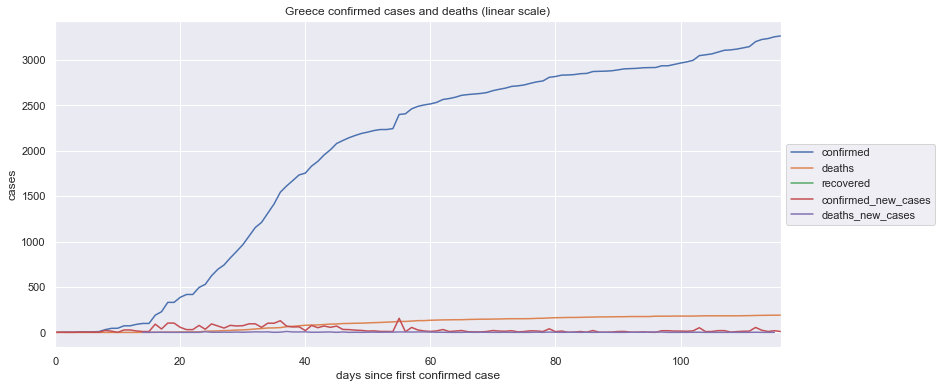

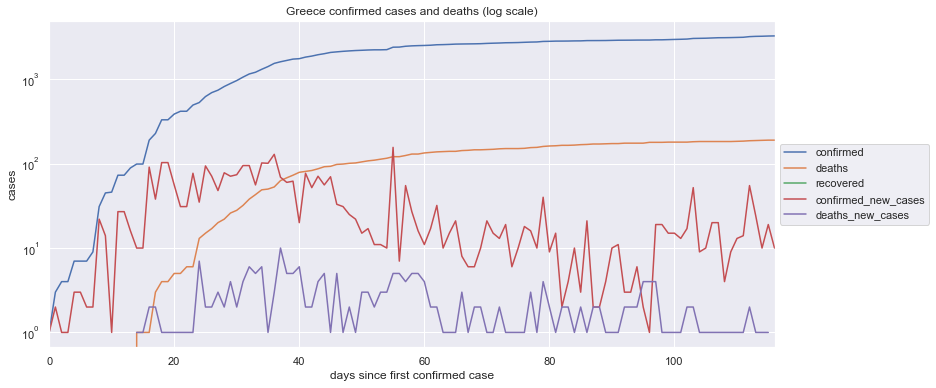

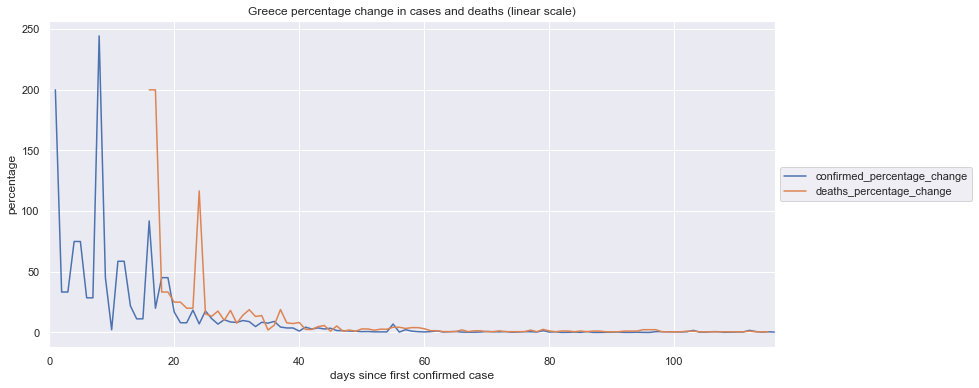

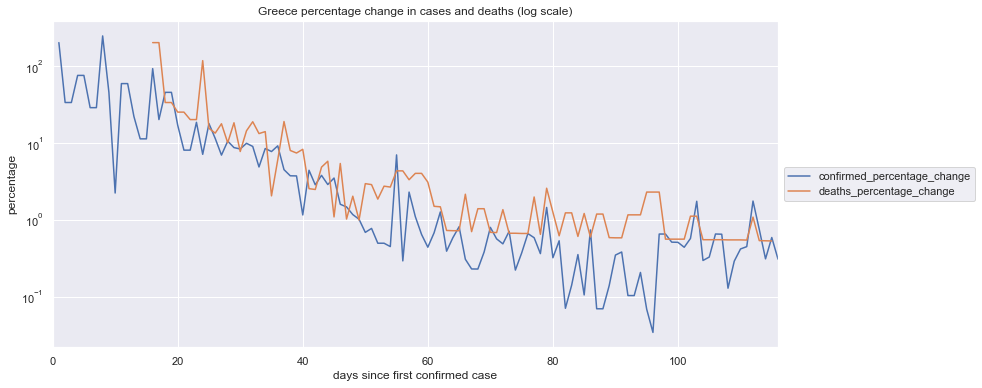

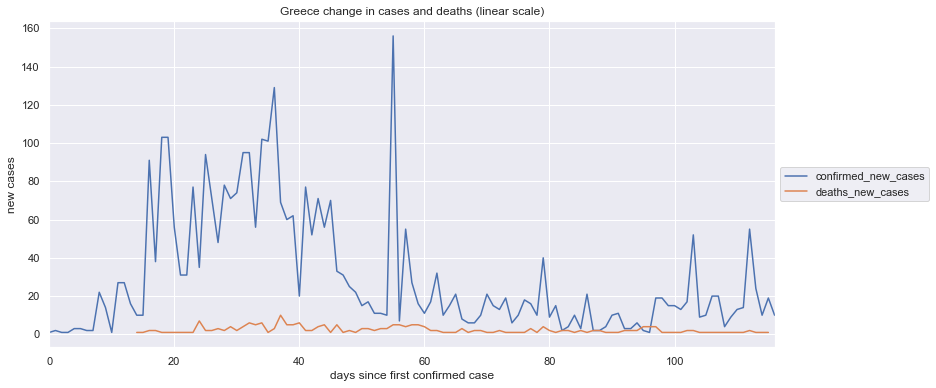

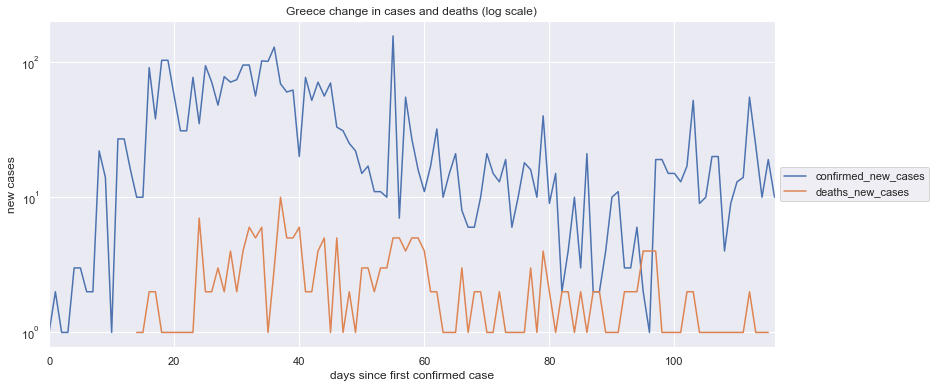

In [11]:
location_name = 'Greece'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Norway

confirmed  deaths recovered  confirmed_percentage_change  \
112       8692     243       NaN                     0.369515   
113       8708     244       NaN                     0.184077   
114       8726     244       NaN                     0.206706   
115       8742     244       NaN                     0.183360   
116       8745     244       NaN                     0.034317   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
112                                         834.287103                 
113                                         415.607818                 
114                                         466.699707                 
115                                         413.988443                 
116                                          77.480764                 

     deaths_percentage_change  \
112                  0.413223   
113                  0.411523   
114                       NaN   
115                       NaN   
116                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
112                                         932.970857           
113                                         929.131471           
114                                                NaN           
115                                                NaN           
116                                                NaN           

     confirmed_new_cases  deaths_new_cases  
112                 32.0               1.0  
113                 16.0               1.0  
114                 18.0               NaN  
115                 16.0               NaN  
116                  3.0               NaN

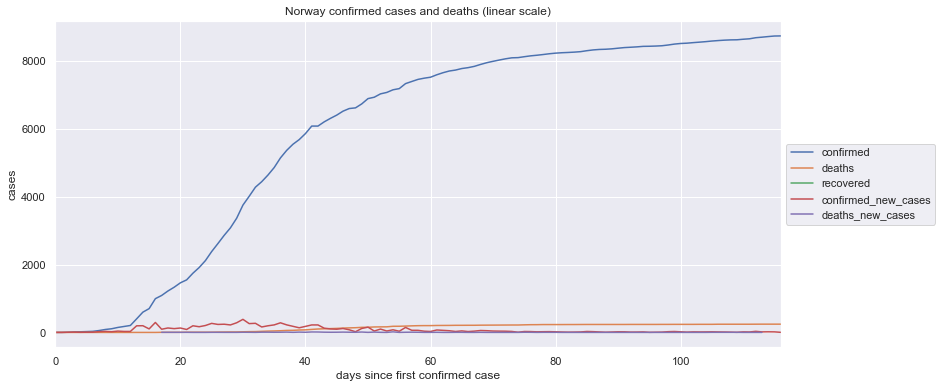

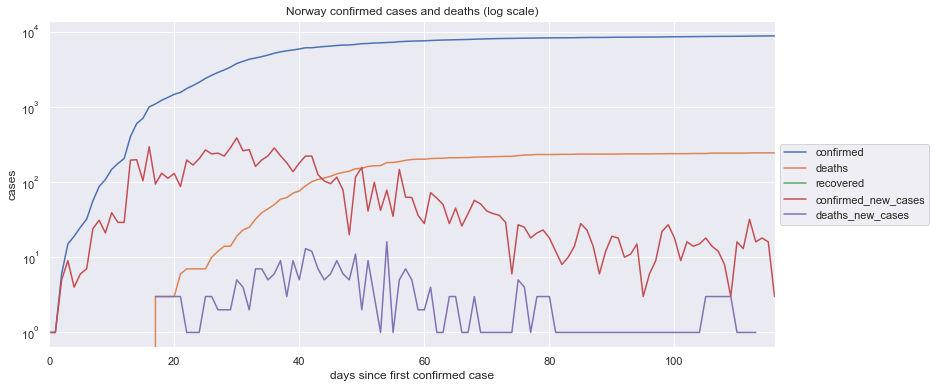

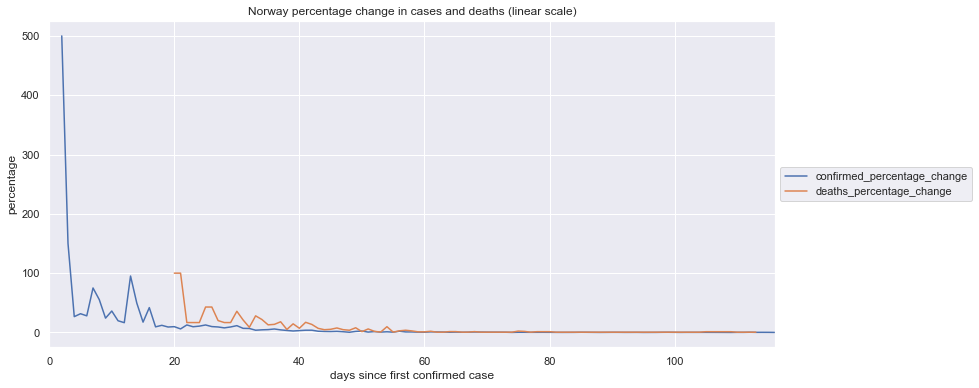

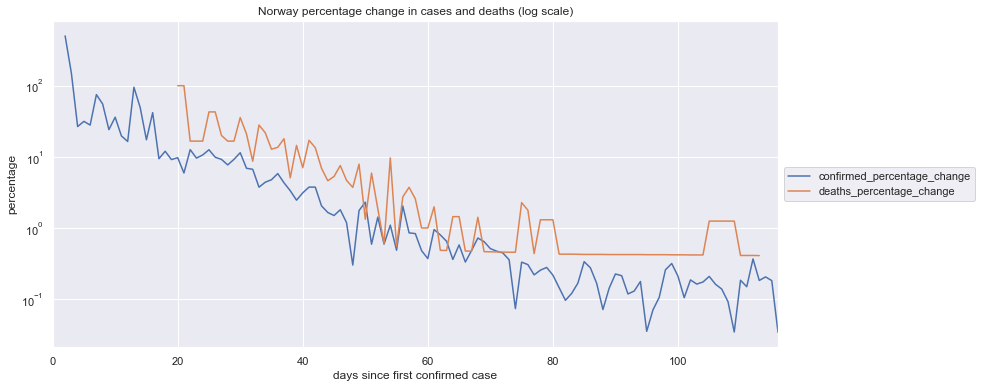

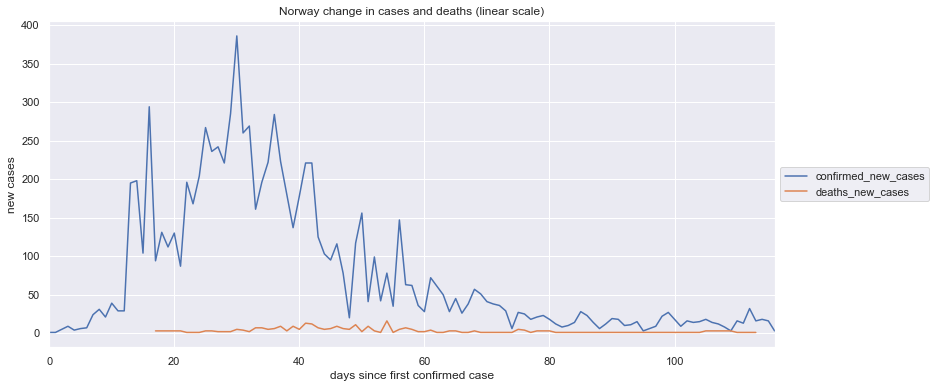

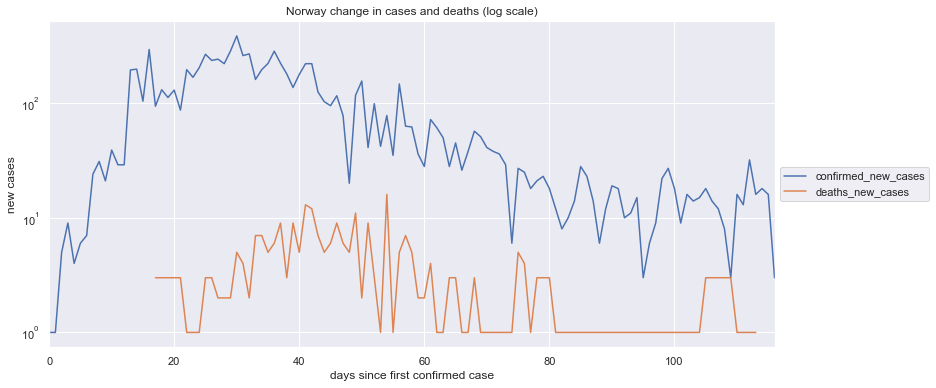

In [12]:
location_name = 'Norway'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Austria

confirmed  deaths recovered  confirmed_percentage_change  \
113      17203     687       NaN                     0.081447   
114      17223     688       NaN                     0.116259   
115      17271     688       NaN                     0.278697   
116      17323     688       NaN                     0.301083   
117      17341     690       NaN                     0.103908   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
113                                         364.417000                 
114                                         520.172048                 
115                                        1246.963210                 
116                                        1347.122420                 
117                                         464.911838                 

     deaths_percentage_change  \
113                  0.881057   
114                  0.145560   
115                  0.145560   
116                  0.290698   
117                  0.290698   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
113                                        3942.079179           
114                                         651.275090           
115                                         651.275090           
116                                        1300.656938           
117                                        1300.656938           

     confirmed_new_cases  deaths_new_cases  
113                 14.0               6.0  
114                 20.0               1.0  
115                 48.0               1.0  
116                 52.0               2.0  
117                 18.0               2.0

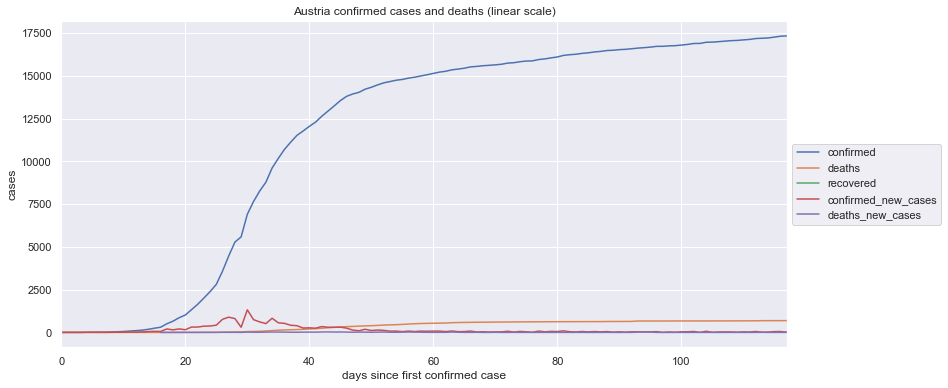

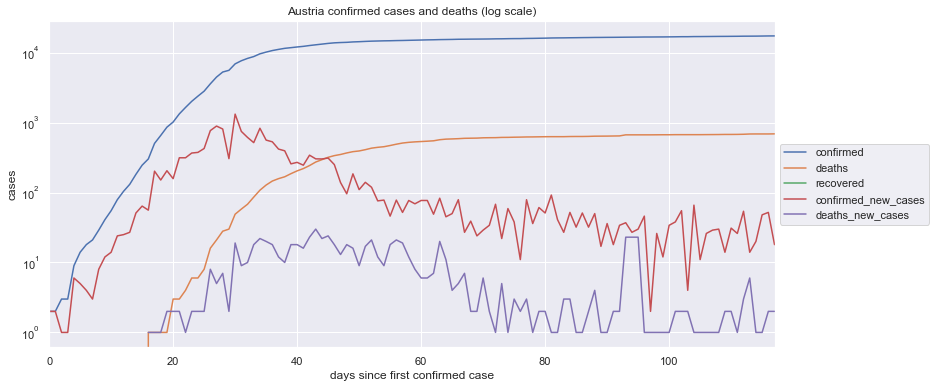

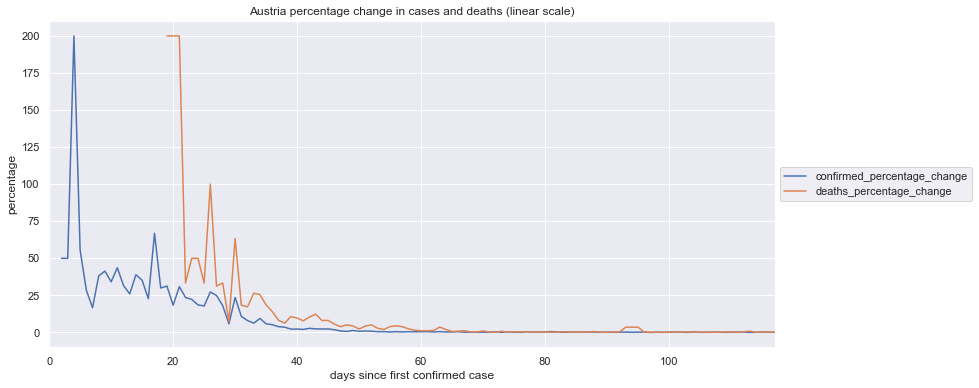

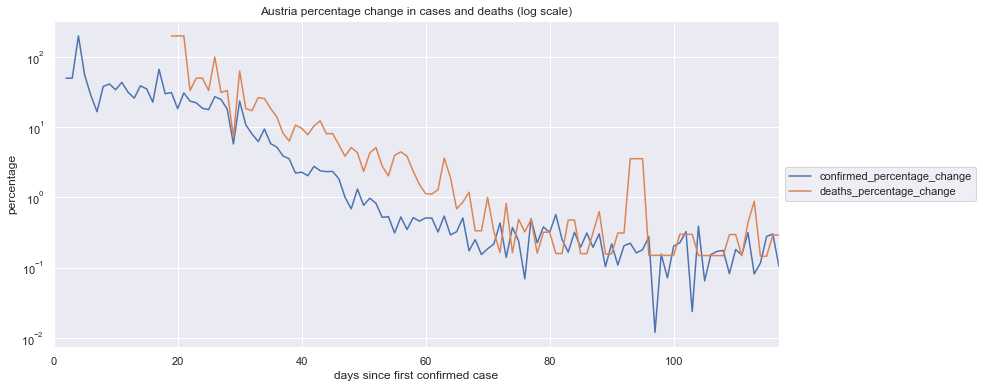

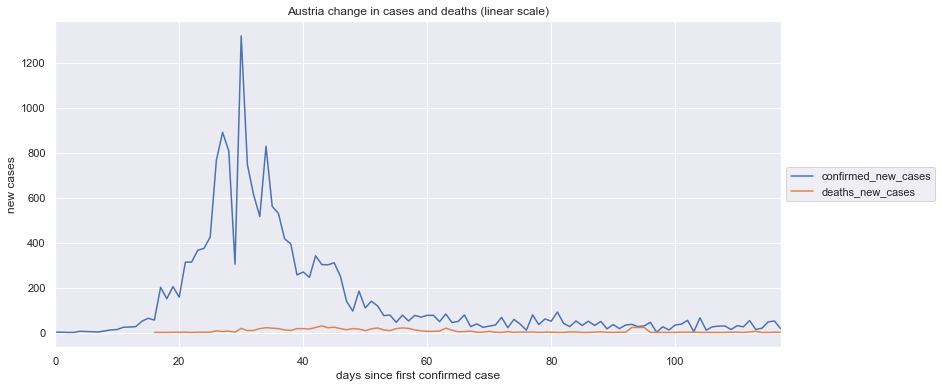

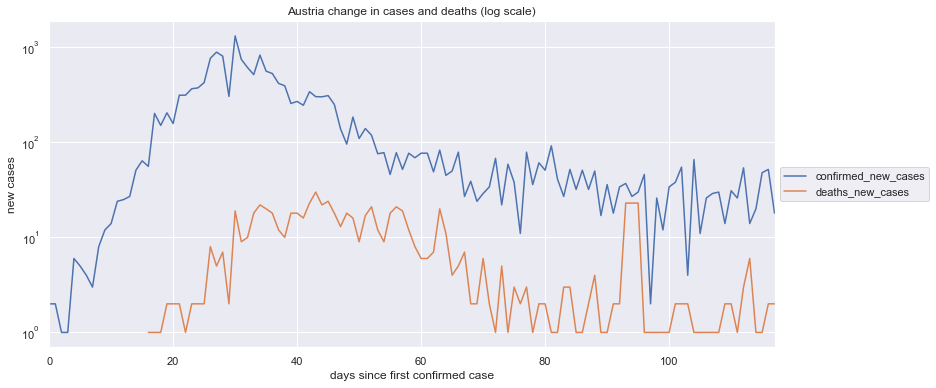

In [13]:
location_name = 'Austria'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Sweden

confirmed  deaths recovered  confirmed_percentage_change  \
138      54562    5041       NaN                     2.323575   
139      56043    5053       NaN                     2.714343   
140      56043    5053       NaN                          NaN   
141      56043    5053       NaN                          NaN   
142      56043    5053       NaN                          NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
138                                       17942.571205                 
139                                       20960.069797                 
140                                                NaN                 
141                                                NaN                 
142                                                NaN                 

     deaths_percentage_change  \
138                  2.065195   
139                  0.238048   
140                       NaN   
141                       NaN   
142                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
138                                       15947.370819           
139                                        1838.198874           
140                                                NaN           
141                                                NaN           
142                                                NaN           

     confirmed_new_cases  deaths_new_cases  
138               1239.0             102.0  
139               1481.0              12.0  
140                  NaN               NaN  
141                  NaN               NaN  
142                  NaN               NaN

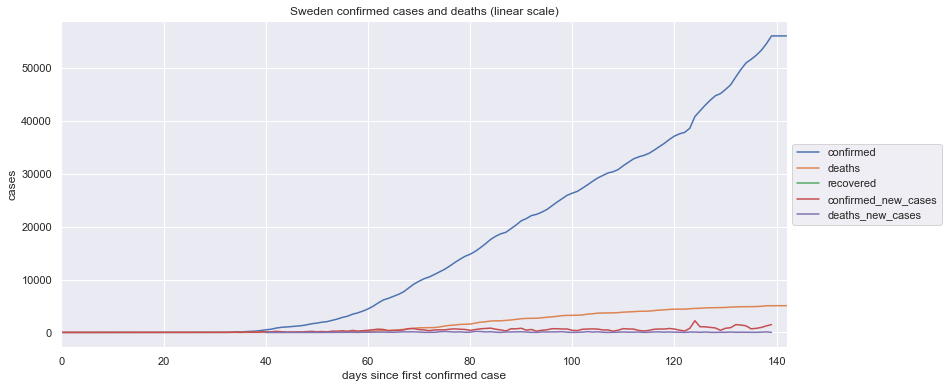

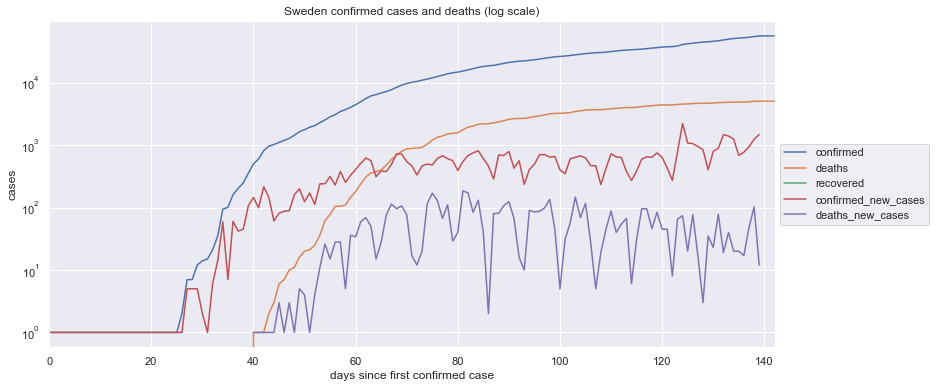

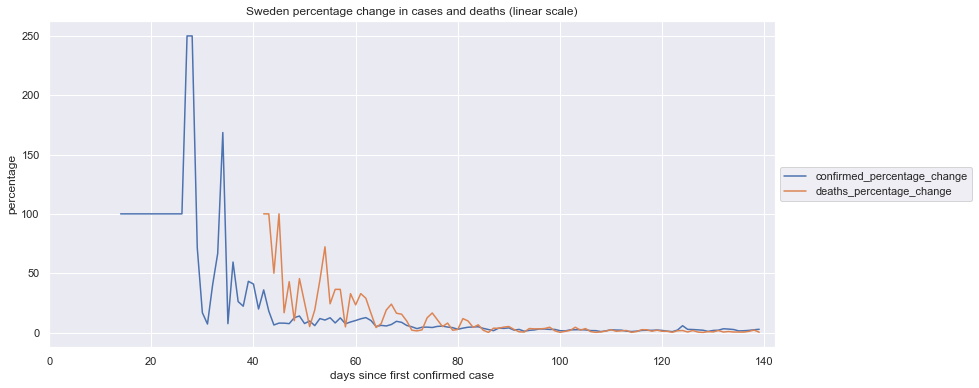

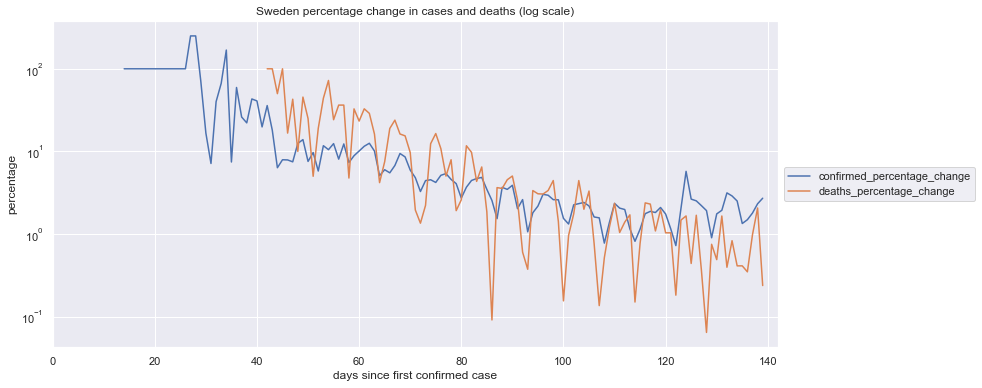

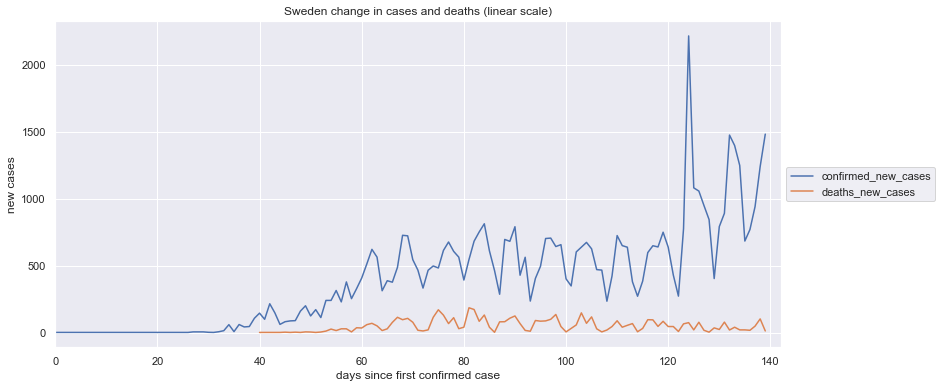

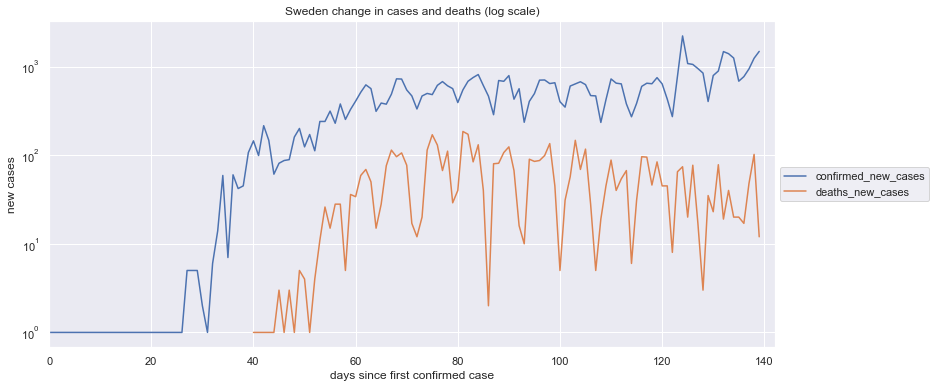

In [14]:
location_name = 'Sweden'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Ireland

confirmed  deaths recovered  confirmed_percentage_change  \
109      25341    1710       NaN                     0.027631   
110      25355    1714       NaN                     0.055246   
111      25368    1714       NaN                     0.051272   
112      25374    1715       NaN                     0.023652   
113      25379    1715       NaN                     0.019705   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
109                                         149.968721                 
110                                         299.854589                 
111                                         278.282663                 
112                                         128.372333                 
113                                         106.951648                 

     deaths_percentage_change  \
109                  0.058514   
110                  0.233918   
111                  0.233918   
112                  0.058343   
113                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
109                                         317.588194           
110                                        1269.609880           
111                                        1269.609880           
112                                         316.661741           
113                                                NaN           

     confirmed_new_cases  deaths_new_cases  
109                  7.0               1.0  
110                 14.0               4.0  
111                 13.0               4.0  
112                  6.0               1.0  
113                  5.0               NaN

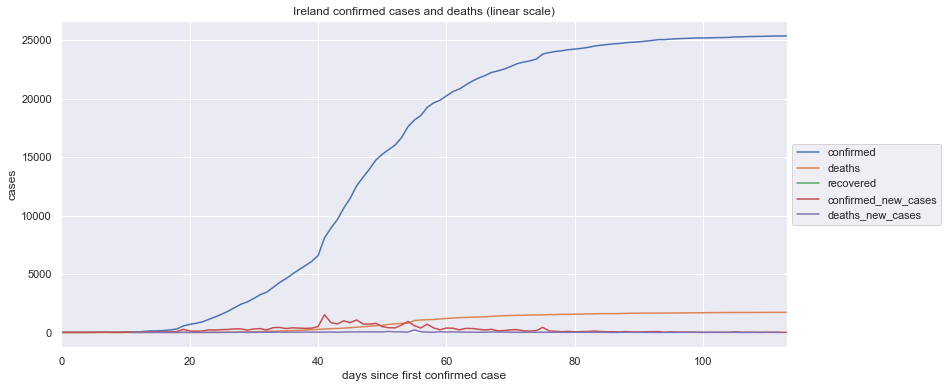

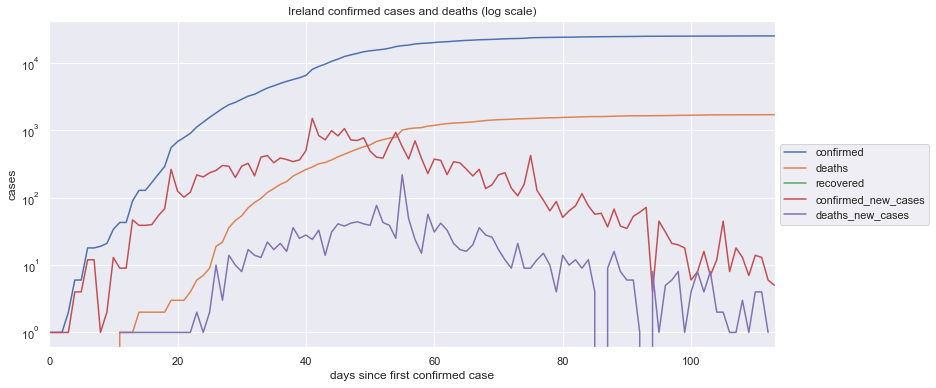

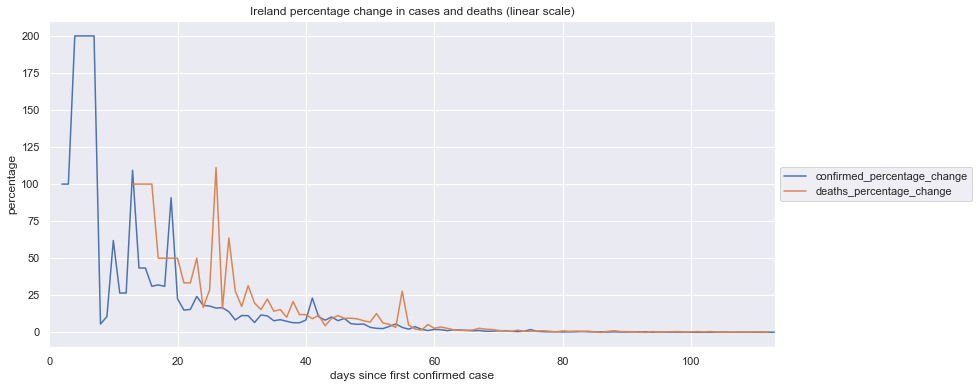

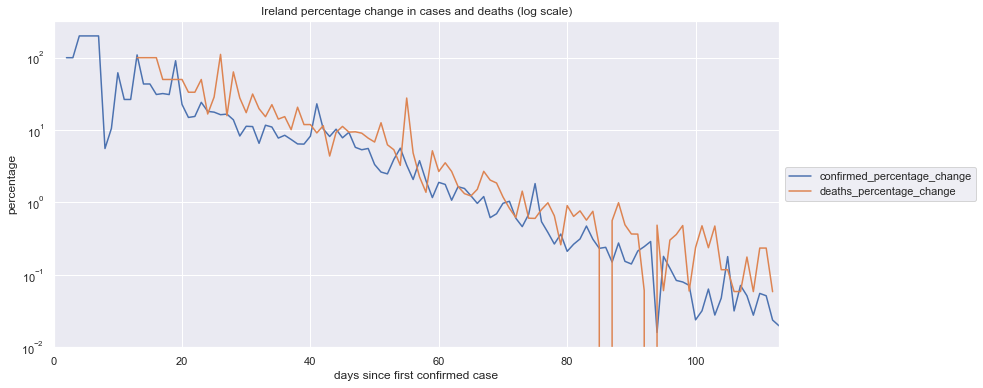

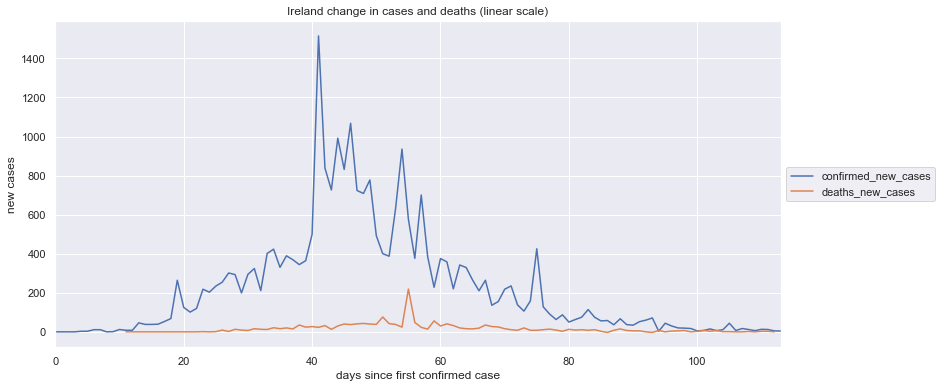

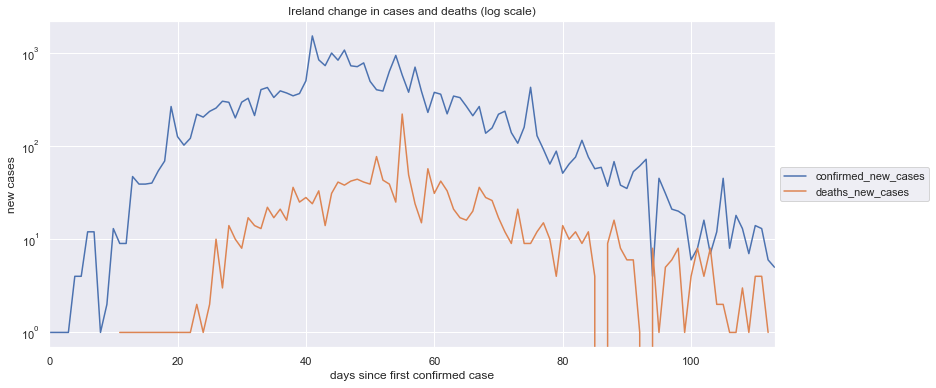

In [15]:
location_name = 'Ireland'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United Kingdom (approximate)

confirmed  deaths recovered  confirmed_percentage_change  \
138     299251   42153       NaN                     0.373990   
139     300469   42288       NaN                     0.407016   
140     301815   42461       NaN                     0.447966   
141     303110   42589       NaN                     0.429071   
142     304331   42632       NaN                     0.402824   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
138                                       20369.214558                 
139                                       22167.949006                 
140                                       24398.280732                 
141                                       23369.142892                 
142                                       21939.626768                 

     deaths_percentage_change  \
138                  0.438419   
139                  0.320262   
140                  0.409100   
141                  0.301453   
142                  0.100965   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
138                                       23878.279833           
139                                       17442.917062           
140                                       22281.416309           
141                                       16418.504163           
142                                        5499.014293           

     confirmed_new_cases  deaths_new_cases  
138               1115.0             184.0  
139               1218.0             135.0  
140               1346.0             173.0  
141               1295.0             128.0  
142               1221.0              43.0

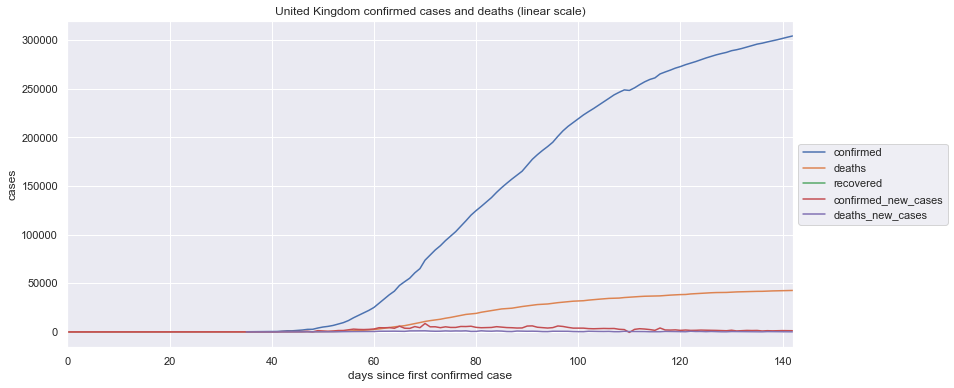

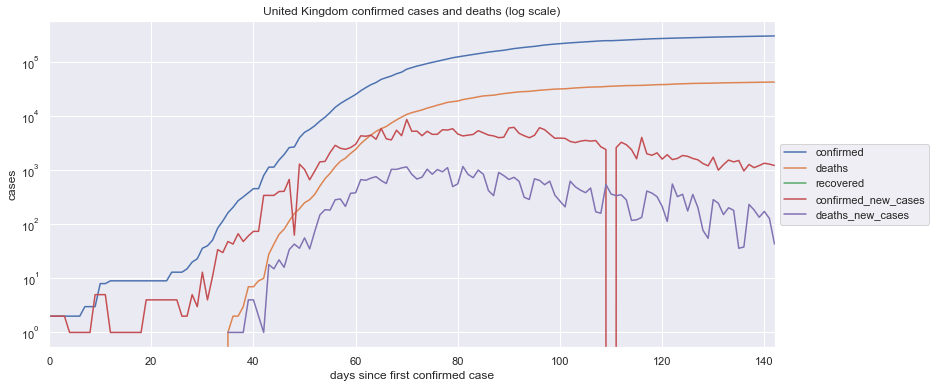

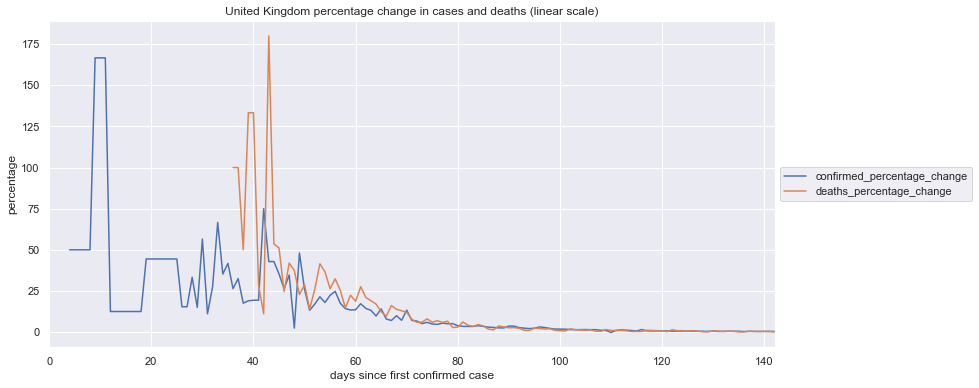

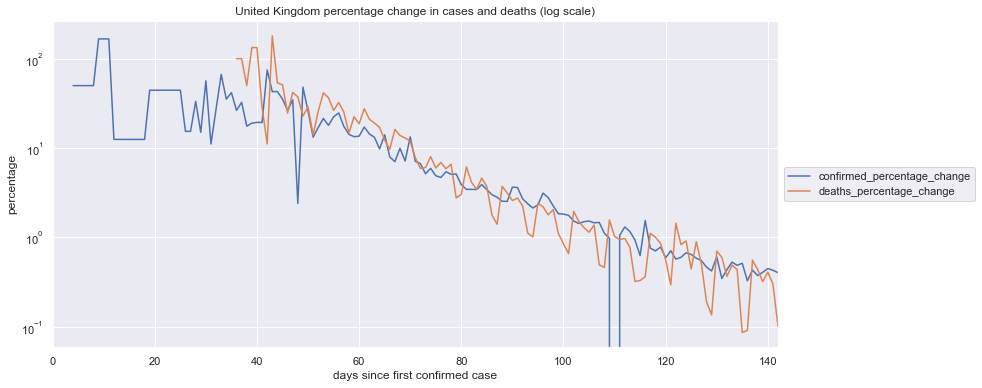

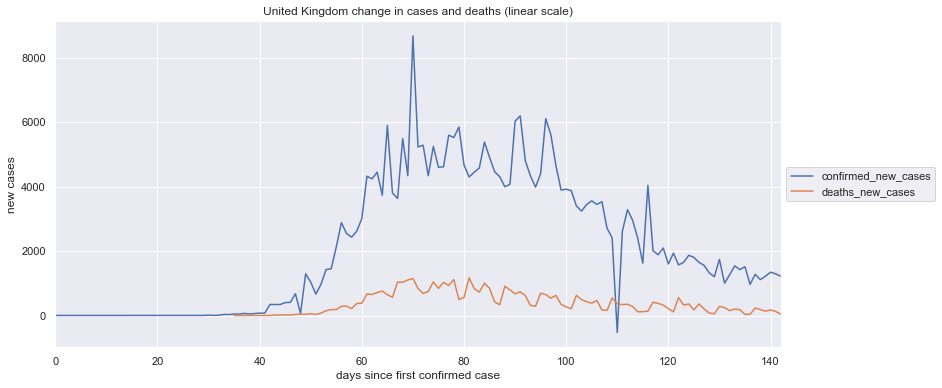

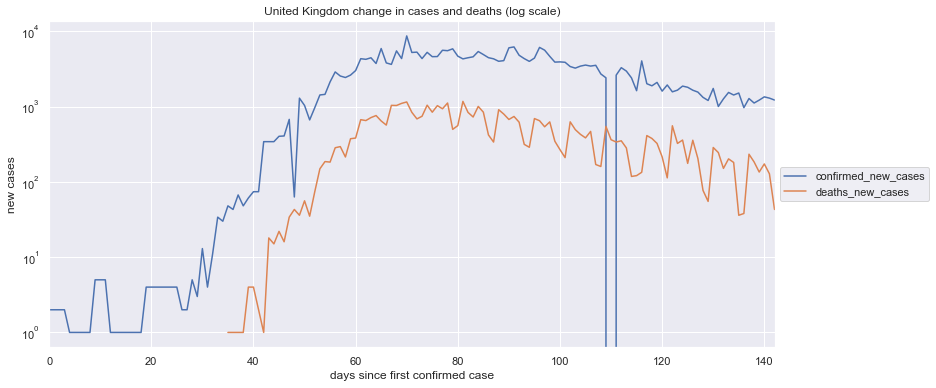

In [16]:
location_name = 'United Kingdom'
#location = df.query('country == @location_name')
location = df.query('country in ["United Kingdom"] and province == ""')
location = process(location)
locations[location_name] = location

# Germany

confirmed  deaths recovered  confirmed_percentage_change  \
142     188604    8851       NaN                     0.186983   
143     189817    8875       NaN                     0.643146   
144     190299    8887       NaN                     0.253929   
145     190670    8895       NaN                     0.194956   
146     191272    8895       NaN                     0.315729   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
142                                        8541.034750                 
143                                       29377.668497                 
144                                       11598.968186                 
145                                        8905.223582                 
146                                       14421.869084                 

     deaths_percentage_change  \
142                  0.351474   
143                  0.271156   
144                  0.135211   
145                  0.090019   
146                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
142                                       16054.638568           
143                                       12385.864517           
144                                        6176.185174           
145                                        4111.897035           
146                                                NaN           

     confirmed_new_cases  deaths_new_cases  
142                352.0              31.0  
143               1213.0              24.0  
144                482.0              12.0  
145                371.0               8.0  
146                602.0               NaN

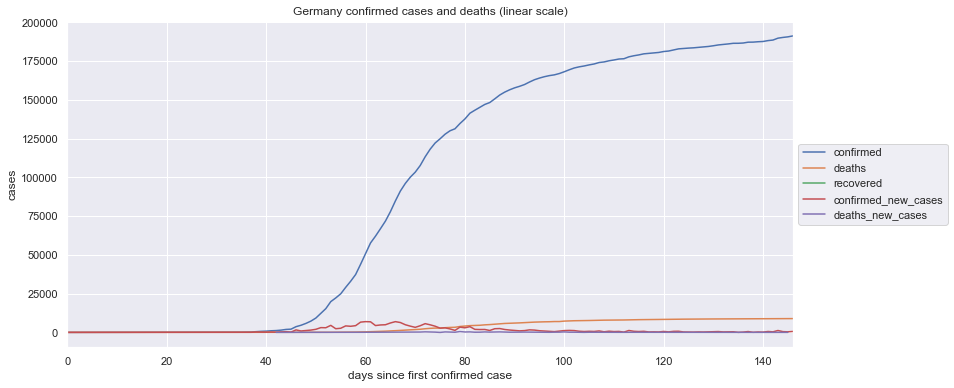

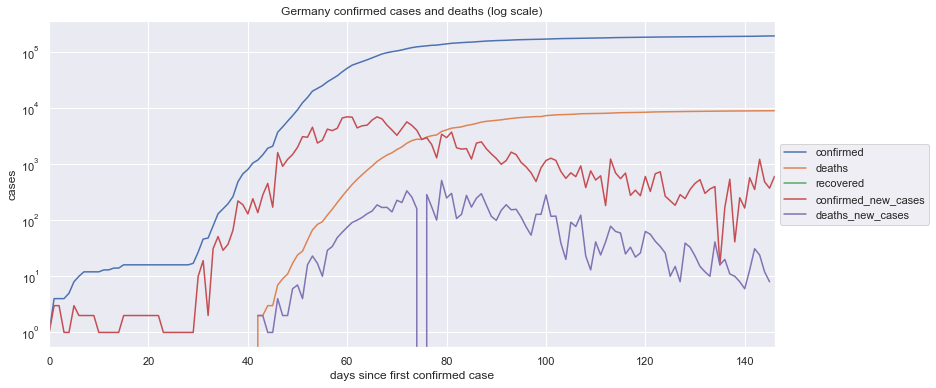

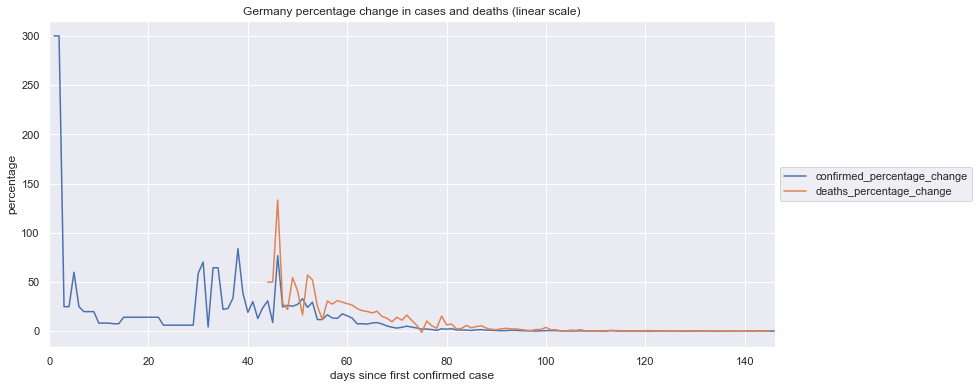

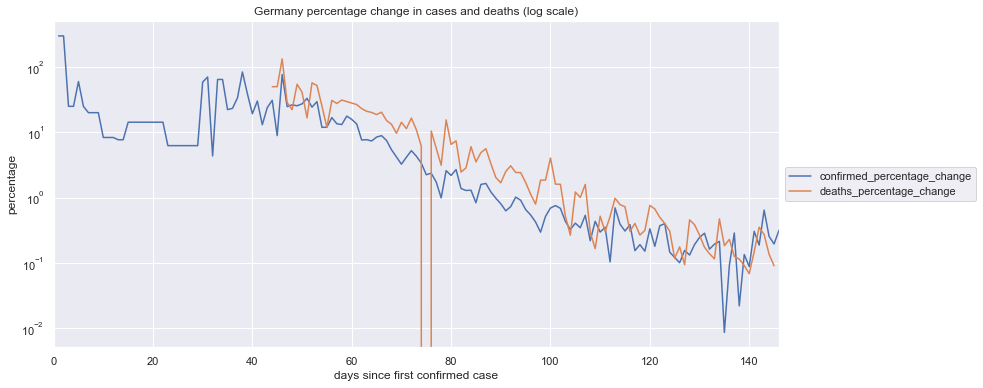

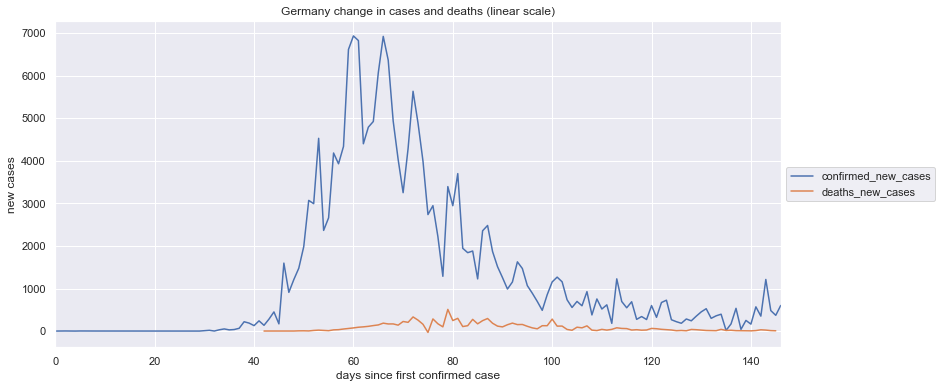

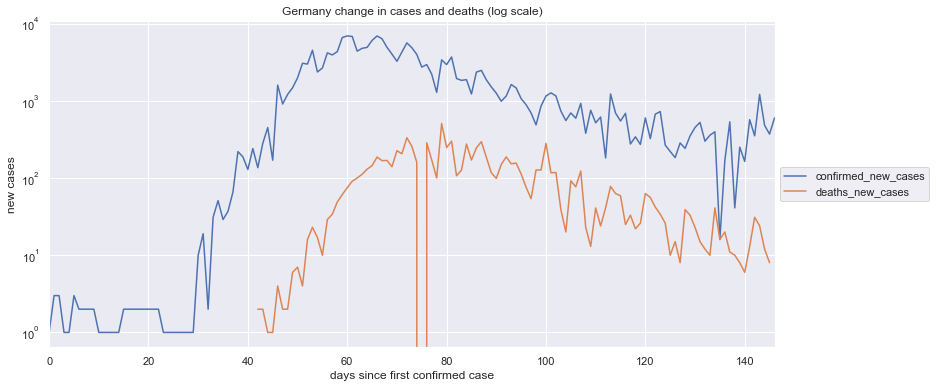

In [17]:
location_name = 'Germany'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Italy

confirmed  deaths recovered  confirmed_percentage_change  \
138     237828   34448       NaN                     0.138105   
139     238159   34514       NaN                     0.139176   
140     238011   34561       NaN                    -0.062143   
141     238275   34610       NaN                     0.110919   
142     238499   34634       NaN                     0.094009   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
138                                        8183.767634                 
139                                        8247.229310                 
140                                       -3682.457789                 
141                                        6572.793042                 
142                                        5570.736290                 

     deaths_percentage_change  \
138                  0.124982   
139                  0.191593   
140                  0.136177   
141                  0.141778   
142                  0.069344   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
138                                        7406.106508           
139                                       11353.322724           
140                                        8069.481368           
141                                        8401.422780           
142                                        4109.156693           

     confirmed_new_cases  deaths_new_cases  
138                328.0              43.0  
139                331.0              66.0  
140               -148.0              47.0  
141                264.0              49.0  
142                224.0              24.0

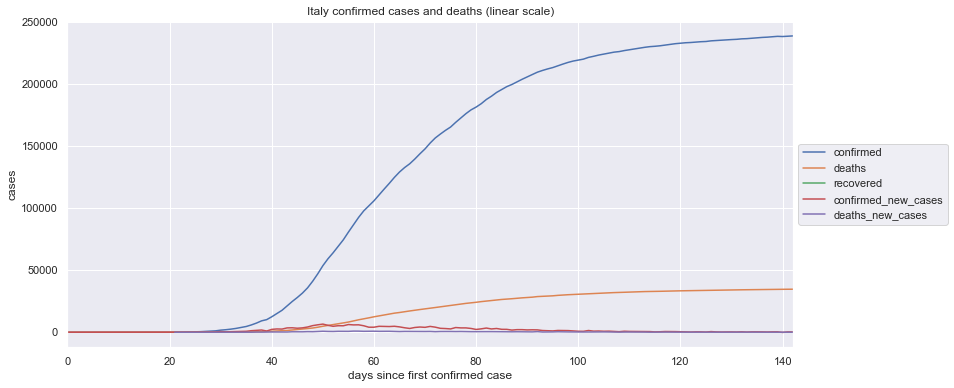

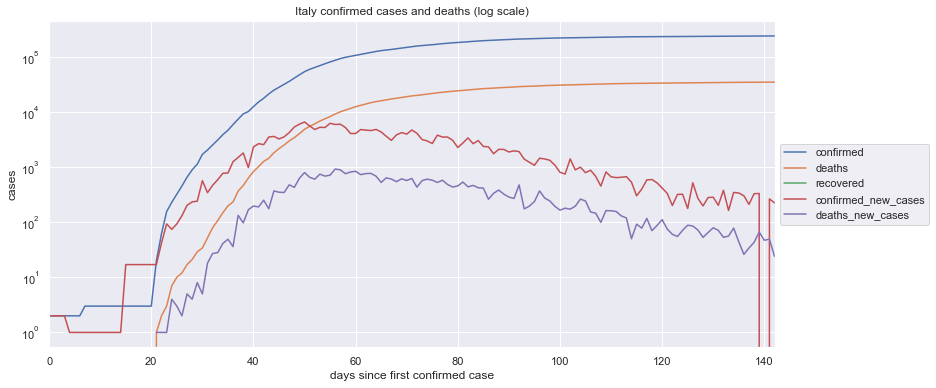

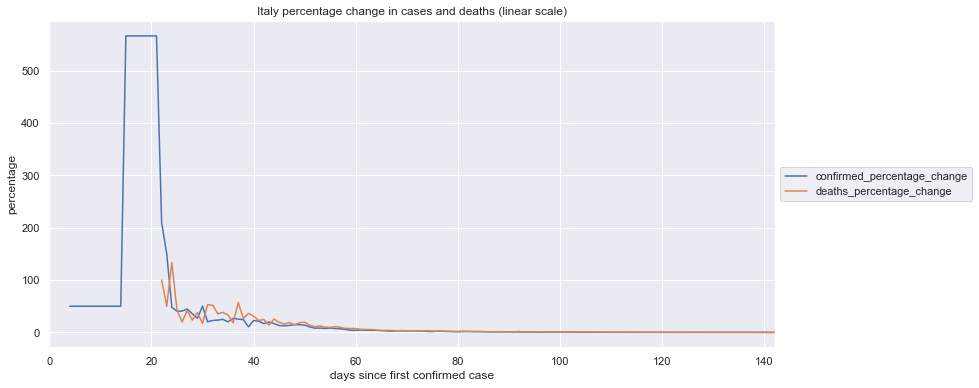

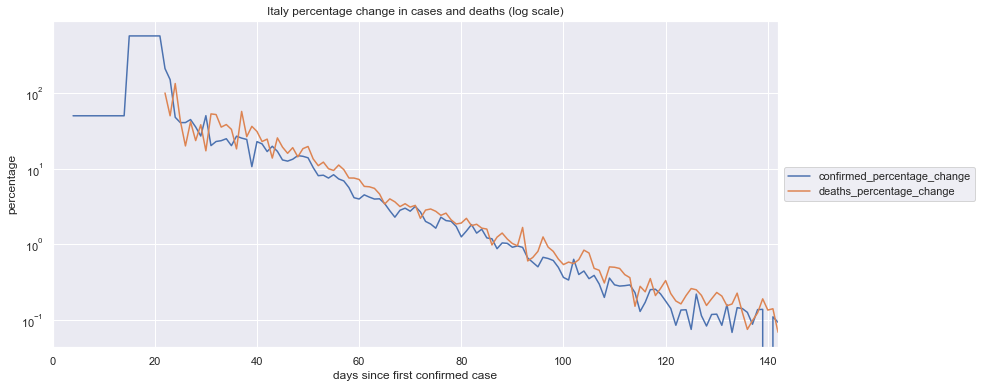

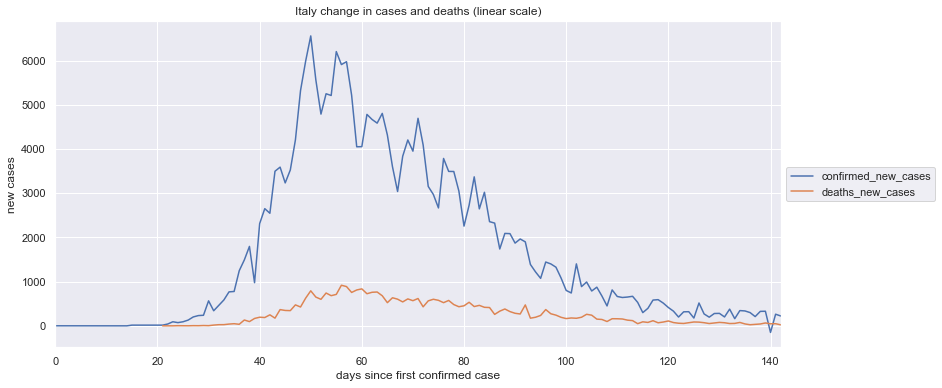

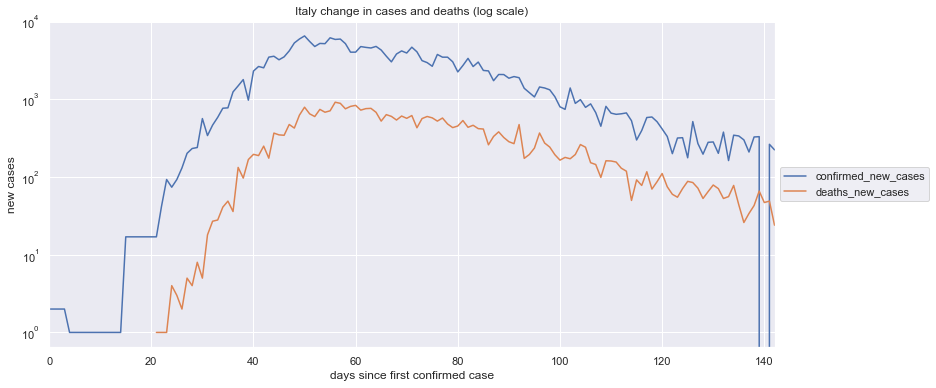

In [18]:
location_name = 'Italy'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# United States of America

confirmed  deaths recovered  confirmed_percentage_change  \
147    2163290  117717       NaN                     1.195613   
148    2191052  118432       NaN                     1.283323   
149    2222579  119124       NaN                     1.438898   
150    2255119  119719       NaN                     1.464065   
151    2279879  119969       NaN                     1.097946   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
147                                      427752.581710                 
148                                      459132.297090                 
149                                      514792.011090                 
150                                      523796.001195                 
151                                      392810.431932                 

     deaths_percentage_change  \
147                  0.644648   
148                  0.607389   
149                  0.584302   
150                  0.499480   
151                  0.208822   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
147                                      230634.718075           
148                                      217304.486412           
149                                      209044.558703           
150                                      178697.935196           
151                                       74710.004864           

     confirmed_new_cases  deaths_new_cases  
147              25559.0             754.0  
148              27762.0             715.0  
149              31527.0             692.0  
150              32540.0             595.0  
151              24760.0             250.0

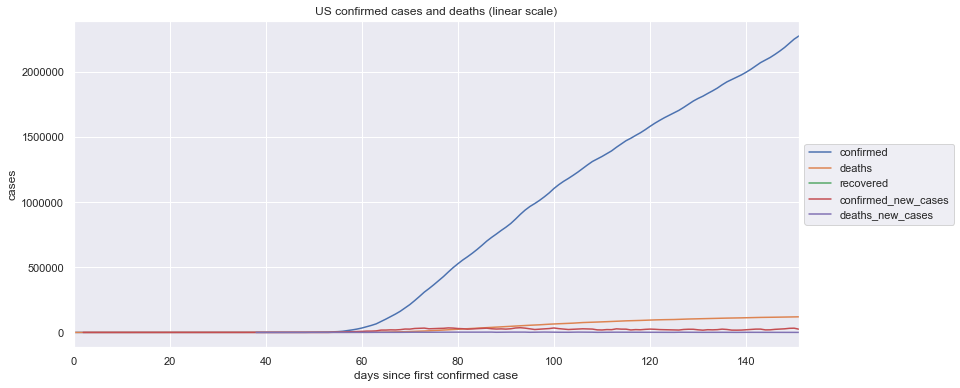

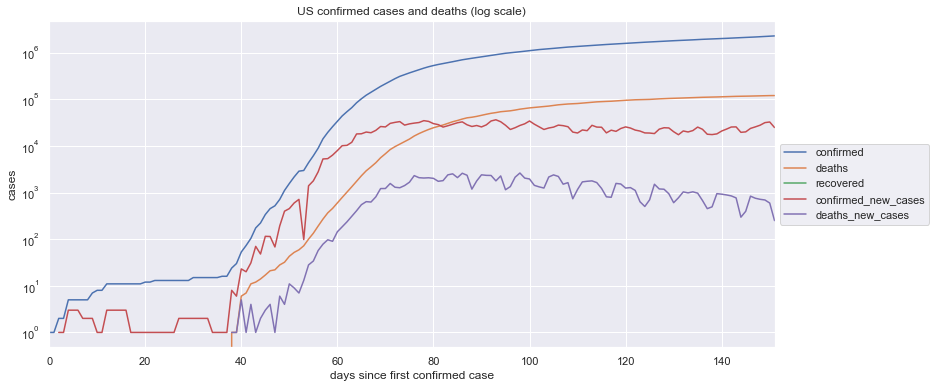

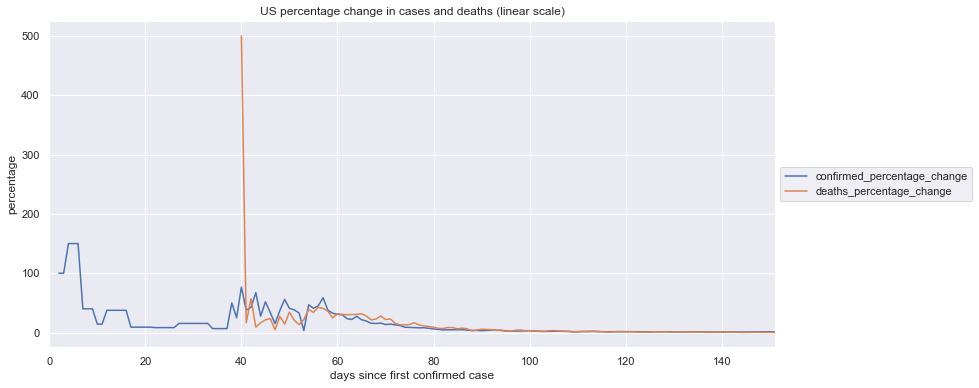

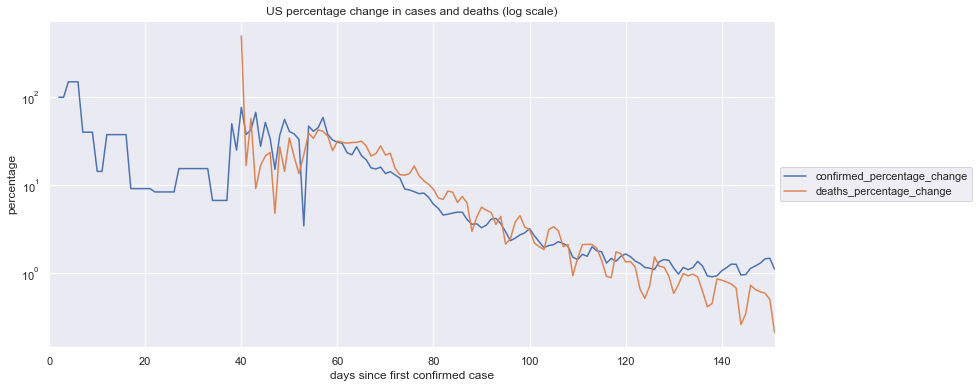

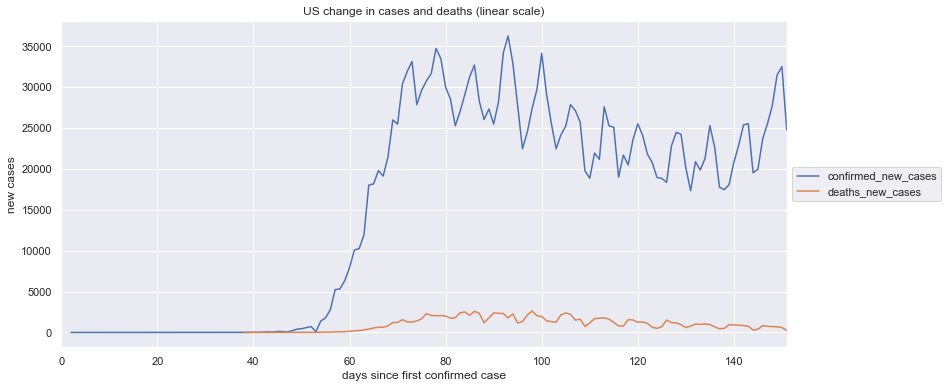

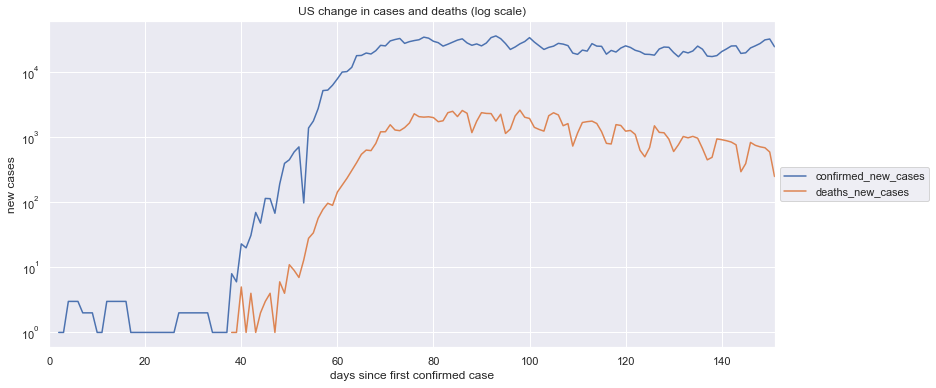

In [19]:
location_name = 'US'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

# Mongolia

confirmed  deaths recovered  confirmed_percentage_change  \
99         201       0       NaN                     2.030457   
100        204       0       NaN                     1.492537   
101        204       0       NaN                     1.492537   
102        206       0       NaN                     0.980392   
103        213       0       NaN                     3.398058   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor  \
99                                           54.454983                 
100                                          40.028476                 
101                                          40.028476                 
102                                          26.293215                 
103                                          91.132793                 

     deaths_percentage_change  \
99                        NaN   
100                       NaN   
101                       NaN   
102                       NaN   
103                       NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor  \
99                                                 NaN           
100                                                NaN           
101                                                NaN           
102                                                NaN           
103                                                NaN           

     confirmed_new_cases  deaths_new_cases  
99                   4.0               NaN  
100                  3.0               NaN  
101                  3.0               NaN  
102                  2.0               NaN  
103                  7.0               NaN

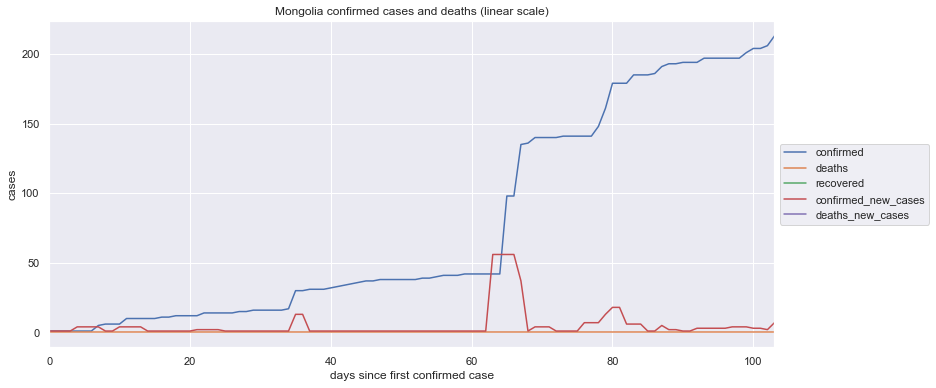

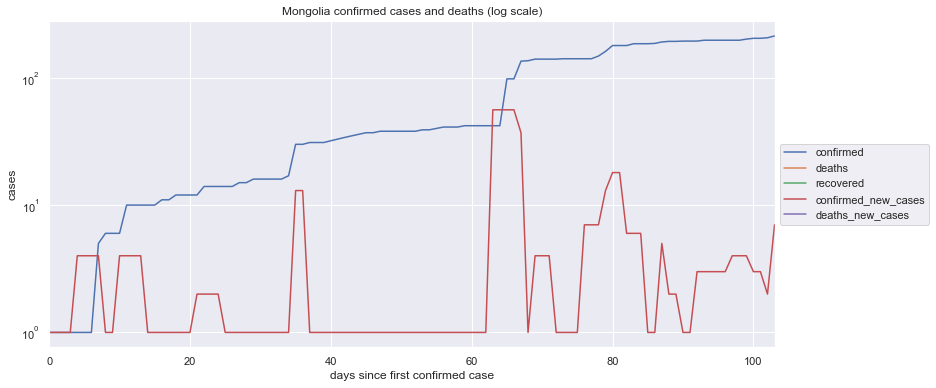

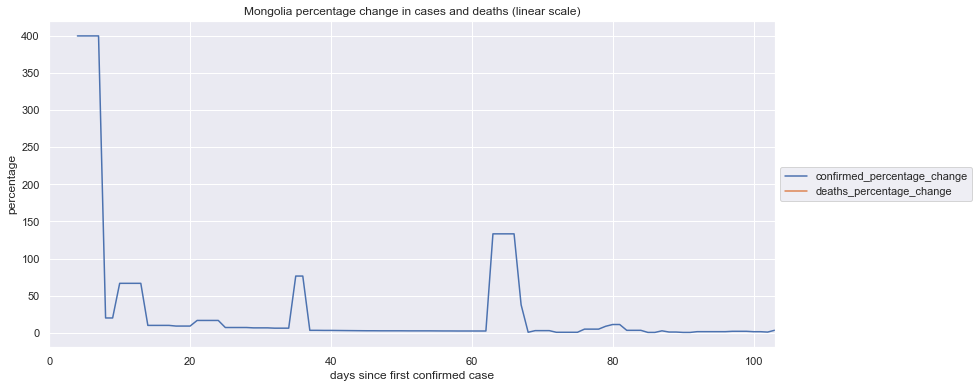

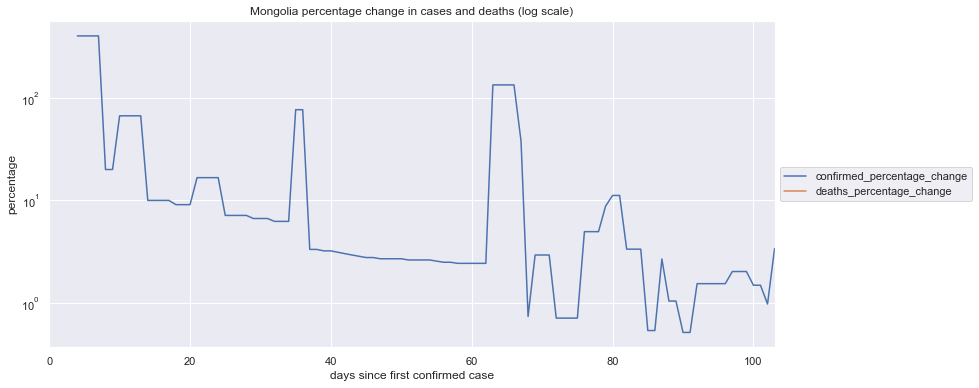

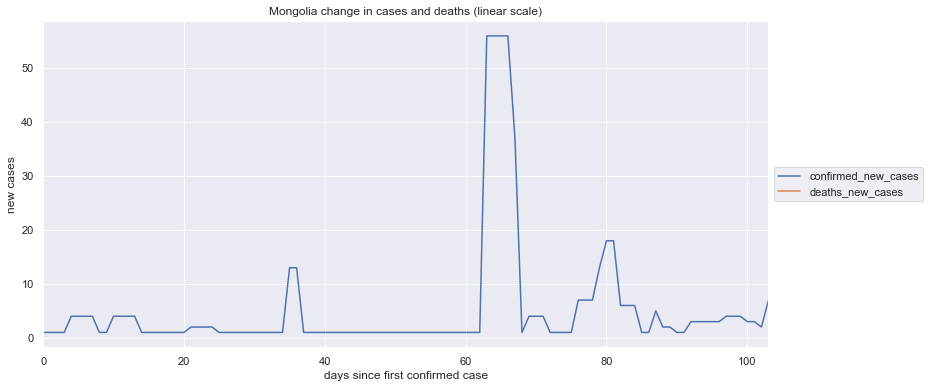

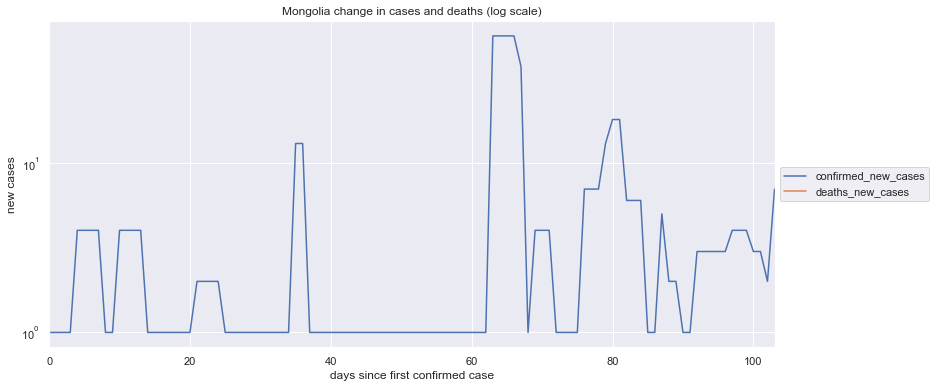

In [20]:
location_name = 'Mongolia'
location = df.query('country == @location_name')
location = process(location)
locations[location_name] = location

---

In [21]:
South_Korea              = locations['Korea, South']
Greece                   = locations['Greece']
Belgium                  = locations['Belgium']
Norway                   = locations['Norway']
Austria                  = locations['Austria']
Sweden                   = locations['Sweden']
Ireland                  = locations['Ireland']
United_Kingdom           = locations['United Kingdom']
Germany                  = locations['Germany']
Italy                    = locations['Italy']
United_States_of_America = locations['US']
Switzerland              = locations['Switzerland']
Mongolia                 = locations['Mongolia']

locations_list           = [South_Korea,
                            Belgium,
                            Greece,
                            Norway,
                            Austria,
                            Sweden,
                            Ireland,
                            United_Kingdom,
                            Germany,
                            Italy,
                            United_States_of_America,
                            Switzerland,
                            Mongolia]

In [22]:
#South_Korea

In [23]:
_df = pd.merge( South_Korea.add_suffix('_South_Korea'), Sweden.add_suffix('_Sweden'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Ireland.add_suffix('_Ireland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                     United_Kingdom.add_suffix('_United_Kingdom'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Germany.add_suffix('_Germany'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                       Italy.add_suffix('_Italy'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df, United_States_of_America.add_suffix('_United_States_of_America'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Greece.add_suffix('_Greece'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                     Norway.add_suffix('_Norway'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Austria.add_suffix('_Austria'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                   Belgium.add_suffix('_Belgium'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                           Switzerland.add_suffix('_Switzerland'), how='outer', left_index=True, right_index=True)
_df = pd.merge(_df,                                 Mongolia.add_suffix('_Mongolia'), how='outer', left_index=True, right_index=True)
_df.tail()

confirmed_South_Korea  deaths_South_Korea recovered_South_Korea  \
147                  12257                 280                   NaN   
148                  12306                 280                   NaN   
149                  12373                 280                   NaN   
150                  12421                 280                   NaN   
151                  12438                 280                   NaN   

     confirmed_percentage_change_South_Korea  \
147                                 0.483686   
148                                 0.399772   
149                                 0.544450   
150                                 0.387941   
151                                 0.136865   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_South_Korea  \
147                                        1857.286840                             
148                                        1535.067555                             
149                                        2090.612249                             
150                                        1489.641707                             
151                                         525.542640                             

     deaths_percentage_change_South_Korea  \
147                              0.358423   
148                                   NaN   
149                                   NaN   
150                                   NaN   
151                                   NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_South_Korea  \
147                                        1376.294567                       
148                                                NaN                       
149                                                NaN                       
150                                                NaN                       
151                                                NaN                       

     confirmed_new_cases_South_Korea  deaths_new_cases_South_Korea  \
147                             59.0                           1.0   
148                             49.0                           NaN   
149                             67.0                           NaN   
150                             48.0                           NaN   
151                             17.0                           NaN   

     confirmed_Sweden  deaths_Sweden recovered_Sweden  \
147               NaN            NaN              NaN   
148               NaN            NaN              NaN   
149               NaN            NaN              NaN   
150               NaN            NaN              NaN   
151               NaN            NaN              NaN   

     confirmed_percentage_change_Sweden  \
147                                 NaN   
148                                 NaN   
149                                 NaN   
150                                 NaN   
151                                 NaN   

     confirmed_percentage_change_by_half_mean_confirmed_cases_factor_Sweden  \
147                                                NaN                        
148                                                NaN                        
149                                                NaN                        
150                                                NaN                        
151                                                NaN                        

     deaths_percentage_change_Sweden  \
147                              NaN   
148                              NaN   
149                              NaN   
150                              NaN   
151                              NaN   

     deaths_percentage_change_by_half_mean_deaths_cases_factor_Sweden  \
147                                                NaN                  
148                                                NaN                  
149                                                NaN                  
150    

# comparisons: confirmed cases

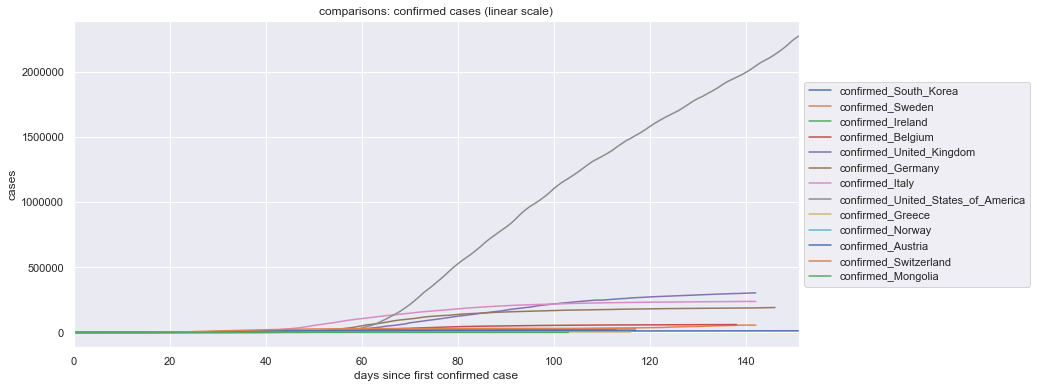

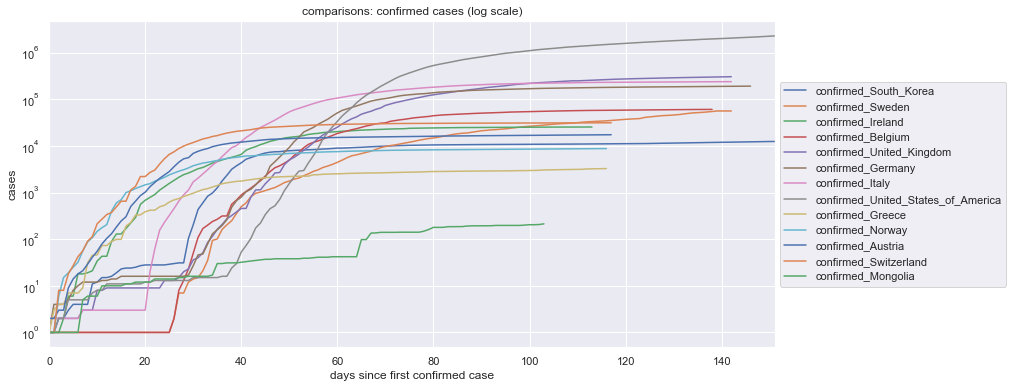

In [24]:
__df = _df[[
    'confirmed_South_Korea',
    'confirmed_Sweden',
    'confirmed_Ireland',
    'confirmed_Belgium',
    'confirmed_United_Kingdom',
    'confirmed_Germany',
    'confirmed_Italy',
    'confirmed_United_States_of_America',
    'confirmed_Greece',
    'confirmed_Norway',
    'confirmed_Austria',
    'confirmed_Switzerland',
    'confirmed_Mongolia']]

title = 'comparisons: confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: confirmed new cases

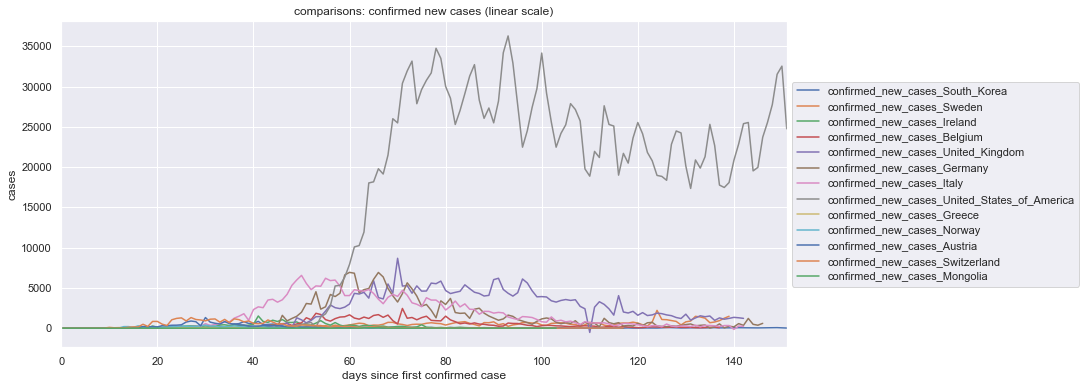

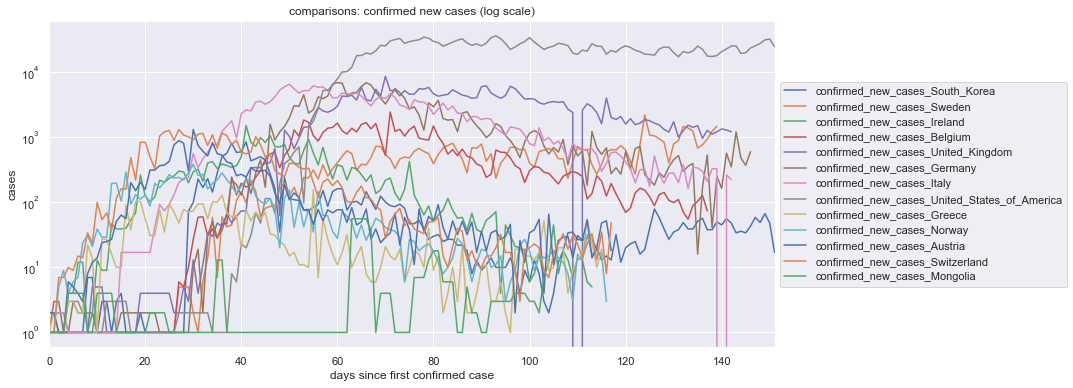

In [25]:
__df = _df[[
    'confirmed_new_cases_South_Korea',
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_United_States_of_America',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland',
    'confirmed_new_cases_Mongolia']]

title = 'comparisons: confirmed new cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

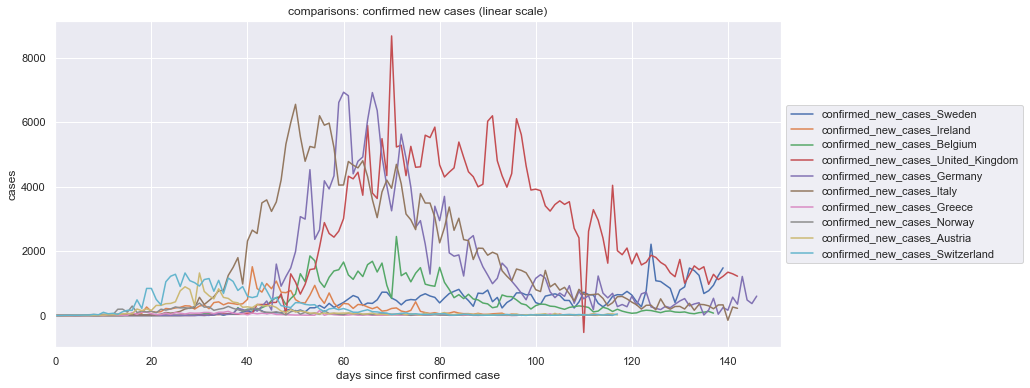

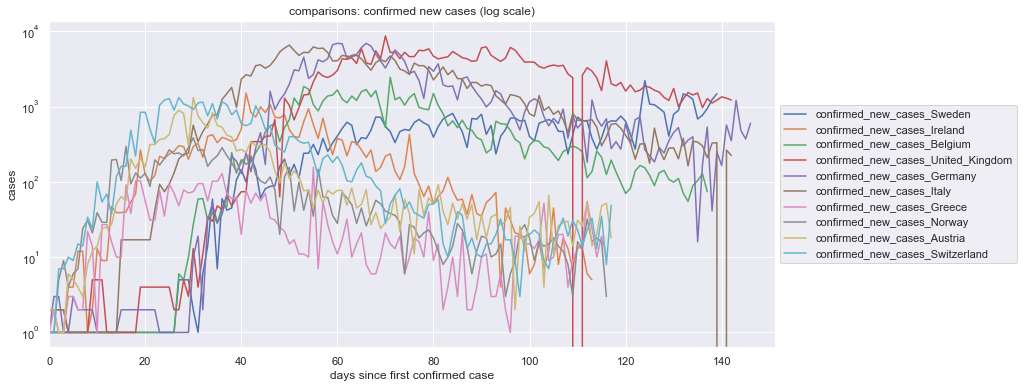

In [26]:
# European
__df = _df[[
    'confirmed_new_cases_Sweden',
    'confirmed_new_cases_Ireland',
    'confirmed_new_cases_Belgium',
    'confirmed_new_cases_United_Kingdom',
    'confirmed_new_cases_Germany',
    'confirmed_new_cases_Italy',
    'confirmed_new_cases_Greece',
    'confirmed_new_cases_Norway',
    'confirmed_new_cases_Austria',
    'confirmed_new_cases_Switzerland']]

title = 'comparisons: confirmed new cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: deaths

deaths_South_Korea  deaths_Sweden  deaths_Ireland  deaths_Belgium  \
147                 280            NaN             NaN             NaN   
148                 280            NaN             NaN             NaN   
149                 280            NaN             NaN             NaN   
150                 280            NaN             NaN             NaN   
151                 280            NaN             NaN             NaN   

     deaths_United_Kingdom  deaths_Germany  deaths_Italy  \
147                    NaN             NaN           NaN   
148                    NaN             NaN           NaN   
149                    NaN             NaN           NaN   
150                    NaN             NaN           NaN   
151                    NaN             NaN           NaN   

     deaths_United_States_of_America  deaths_Greece  deaths_Norway  \
147                           117717            NaN            NaN   
148                           118432            NaN            NaN   
149                           119124            NaN            NaN   
150                           119719            NaN            NaN   
151                           119969            NaN            NaN   

     deaths_Austria  deaths_Switzerland  deaths_Mongolia  
147             NaN                 NaN              NaN  
148             NaN                 NaN              NaN  
149             NaN                 NaN              NaN  
150             NaN                 NaN              NaN  
151             NaN                 NaN              NaN

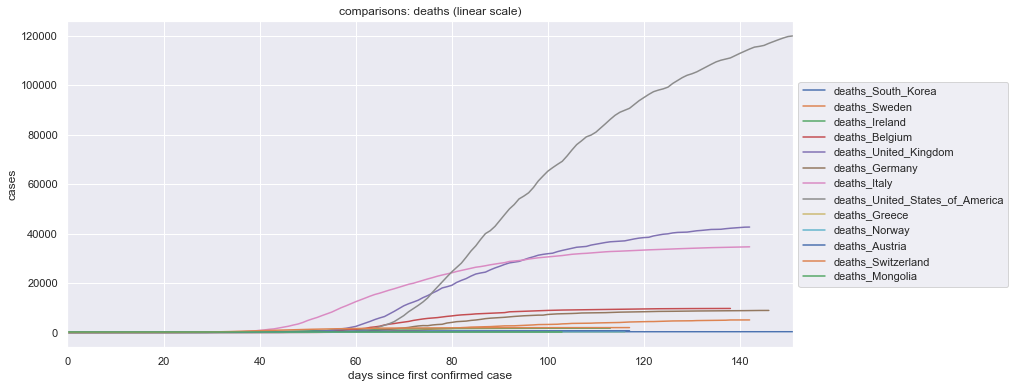

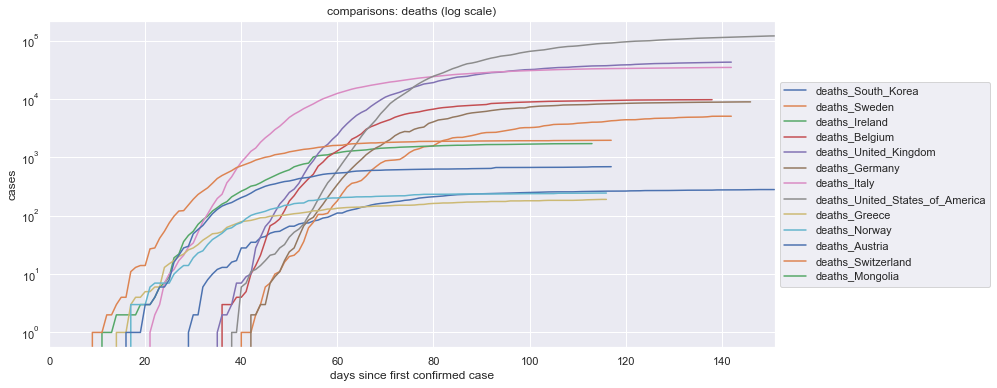

In [27]:
__df = _df[[
    'deaths_South_Korea',
    'deaths_Sweden',
    'deaths_Ireland',
    'deaths_Belgium',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_United_States_of_America',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland',
    'deaths_Mongolia']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_Sweden  deaths_Belgium  deaths_Ireland  deaths_United_Kingdom  \
147            NaN             NaN             NaN                    NaN   
148            NaN             NaN             NaN                    NaN   
149            NaN             NaN             NaN                    NaN   
150            NaN             NaN             NaN                    NaN   
151            NaN             NaN             NaN                    NaN   

     deaths_Germany  deaths_Italy  deaths_Greece  deaths_Norway  \
147             NaN           NaN            NaN            NaN   
148             NaN           NaN            NaN            NaN   
149             NaN           NaN            NaN            NaN   
150             NaN           NaN            NaN            NaN   
151             NaN           NaN            NaN            NaN   

     deaths_Austria  deaths_Switzerland  
147             NaN                 NaN  
148             NaN                 NaN  
149             NaN                 NaN  
150             NaN                 NaN  
151             NaN                 NaN

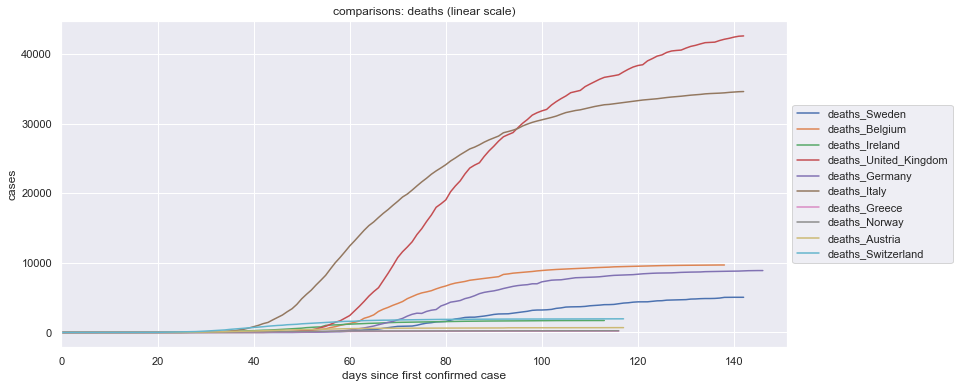

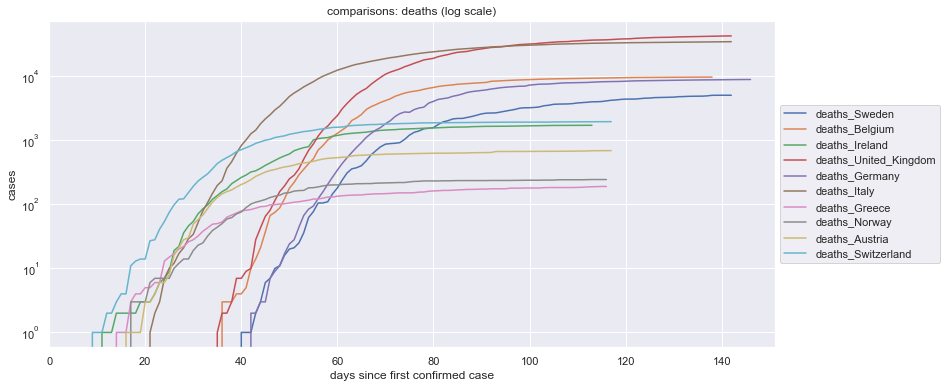

In [28]:
# some European countries
__df = _df[[
    'deaths_Sweden',
    'deaths_Belgium',
    'deaths_Ireland',
    'deaths_United_Kingdom',
    'deaths_Germany',
    'deaths_Italy',
    'deaths_Greece',
    'deaths_Norway',
    'deaths_Austria',
    'deaths_Switzerland']]
display(__df.tail())

title = 'comparisons: deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: new deaths

deaths_new_cases_South_Korea  deaths_new_cases_Sweden  \
147                           1.0                      NaN   
148                           NaN                      NaN   
149                           NaN                      NaN   
150                           NaN                      NaN   
151                           NaN                      NaN   

     deaths_new_cases_Ireland  deaths_new_cases_Belgium  \
147                       NaN                       NaN   
148                       NaN                       NaN   
149                       NaN                       NaN   
150                       NaN                       NaN   
151                       NaN                       NaN   

     deaths_new_cases_United_Kingdom  deaths_new_cases_Germany  \
147                              NaN                       NaN   
148                              NaN                       NaN   
149                              NaN                       NaN   
150                              NaN                       NaN   
151                              NaN                       NaN   

     deaths_new_cases_Italy  deaths_new_cases_United_States_of_America  \
147                     NaN                                      754.0   
148                     NaN                                      715.0   
149                     NaN                                      692.0   
150                     NaN                                      595.0   
151                     NaN                                      250.0   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
147                      NaN                      NaN   
148                      NaN                      NaN   
149                      NaN                      NaN   
150                      NaN                      NaN   
151                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  \
147                       NaN                           NaN   
148                       NaN                           NaN   
149                       NaN                           NaN   
150                       NaN                           NaN   
151                       NaN                           NaN   

     deaths_new_cases_Mongolia  
147                        NaN  
148                        NaN  
149                        NaN  
150                        NaN  
151                        NaN

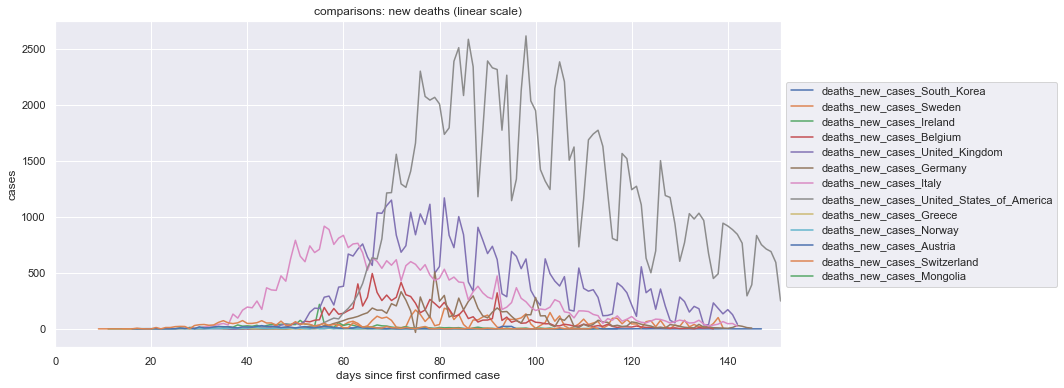

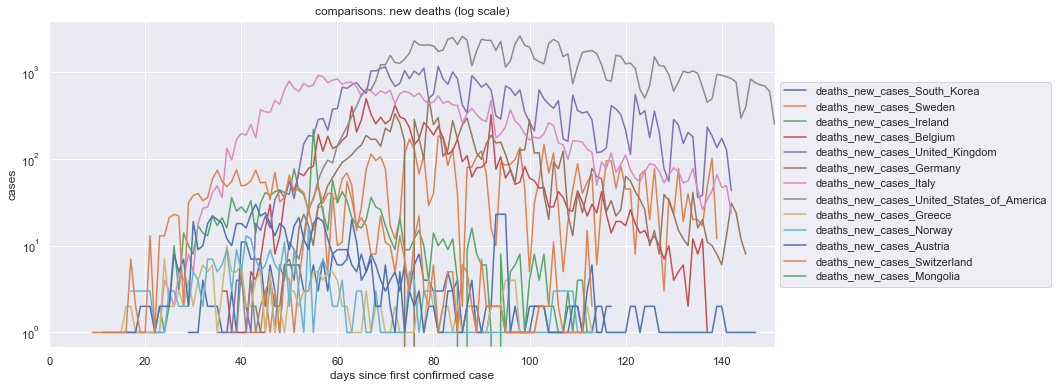

In [29]:
__df = _df[[
    'deaths_new_cases_South_Korea',
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_United_States_of_America',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland',
    'deaths_new_cases_Mongolia']]
display(__df.tail())

title = 'comparisons: new deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

deaths_new_cases_Sweden  deaths_new_cases_Belgium  \
147                      NaN                       NaN   
148                      NaN                       NaN   
149                      NaN                       NaN   
150                      NaN                       NaN   
151                      NaN                       NaN   

     deaths_new_cases_Ireland  deaths_new_cases_United_Kingdom  \
147                       NaN                              NaN   
148                       NaN                              NaN   
149                       NaN                              NaN   
150                       NaN                              NaN   
151                       NaN                              NaN   

     deaths_new_cases_Germany  deaths_new_cases_Italy  \
147                       NaN                     NaN   
148                       NaN                     NaN   
149                       NaN                     NaN   
150                       NaN                     NaN   
151                       NaN                     NaN   

     deaths_new_cases_Greece  deaths_new_cases_Norway  \
147                      NaN                      NaN   
148                      NaN                      NaN   
149                      NaN                      NaN   
150                      NaN                      NaN   
151                      NaN                      NaN   

     deaths_new_cases_Austria  deaths_new_cases_Switzerland  
147                       NaN                           NaN  
148                       NaN                           NaN  
149                       NaN                           NaN  
150                       NaN                           NaN  
151                       NaN                           NaN

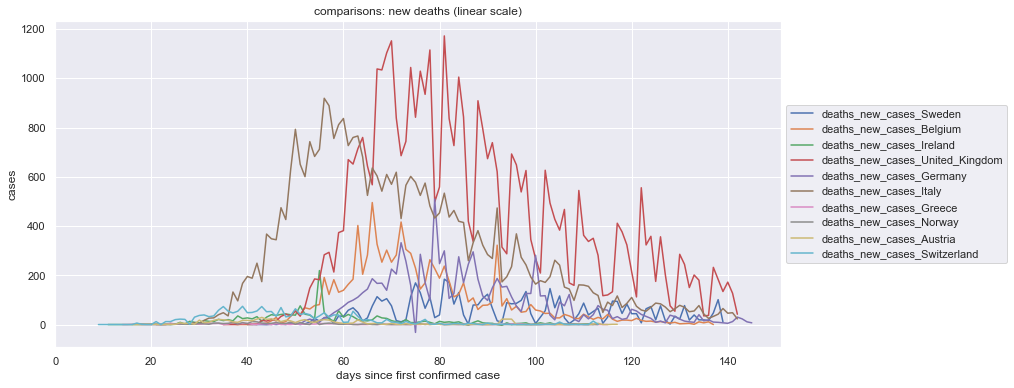

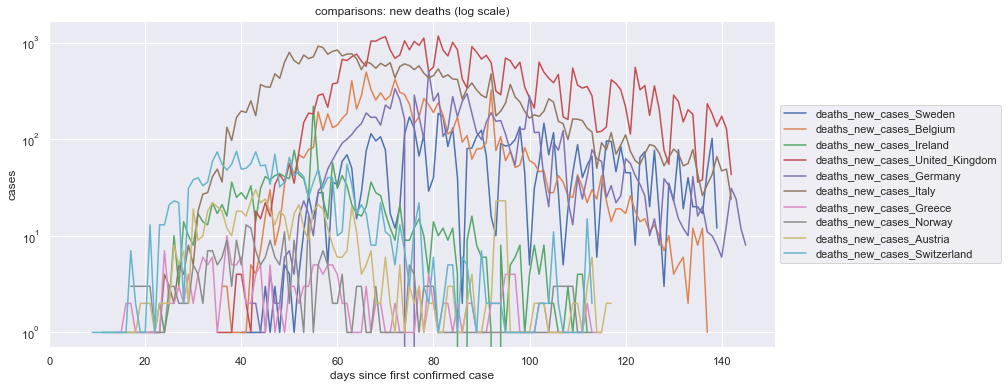

In [30]:
# European
__df = _df[[
    'deaths_new_cases_Sweden',
    'deaths_new_cases_Belgium',
    'deaths_new_cases_Ireland',
    'deaths_new_cases_United_Kingdom',
    'deaths_new_cases_Germany',
    'deaths_new_cases_Italy',
    'deaths_new_cases_Greece',
    'deaths_new_cases_Norway',
    'deaths_new_cases_Austria',
    'deaths_new_cases_Switzerland']]
display(__df.tail())

title = 'comparisons: new deaths'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('cases');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('cases');

# comparisons: changes in confirmed cases

confirmed_percentage_change_South_Korea  \
147                                 0.483686   
148                                 0.399772   
149                                 0.544450   
150                                 0.387941   
151                                 0.136865   

     confirmed_percentage_change_Sweden  confirmed_percentage_change_Ireland  \
147                                 NaN                                  NaN   
148                                 NaN                                  NaN   
149                                 NaN                                  NaN   
150                                 NaN                                  NaN   
151                                 NaN                                  NaN   

     confirmed_percentage_change_Belgium  \
147                                  NaN   
148                                  NaN   
149                                  NaN   
150                                  NaN   
151                                  NaN   

     confirmed_percentage_change_United_Kingdom  \
147                                         NaN   
148                                         NaN   
149                                         NaN   
150                                         NaN   
151                                         NaN   

     confirmed_percentage_change_Germany  confirmed_percentage_change_Italy  \
147                                  NaN                                NaN   
148                                  NaN                                NaN   
149                                  NaN                                NaN   
150                                  NaN                                NaN   
151                                  NaN                                NaN   

     confirmed_percentage_change_United_States_of_America  \
147                                           1.195613      
148                                           1.283323      
149                                           1.438898      
150                                           1.464065      
151                                           1.097946      

     confirmed_percentage_change_Greece  confirmed_percentage_change_Norway  \
147                                 NaN                                 NaN   
148                                 NaN                                 NaN   
149                                 NaN                                 NaN   
150                                 NaN                                 NaN   
151                                 NaN                                 NaN   

     confirmed_percentage_change_Austria  \
147                                  NaN   
148                                  NaN   
149                                  NaN   
150                                  NaN   
151                                  NaN   

     confirmed_percentage_change_Switzerland  \
147                                      NaN   
148                                      NaN   
149                                      NaN   
150                                      NaN   
151                                      NaN   

     confirmed_percentage_change_Mongolia  
147                                   NaN  
148                                   NaN  
149                                   NaN  
150                                   NaN  
151                                   NaN

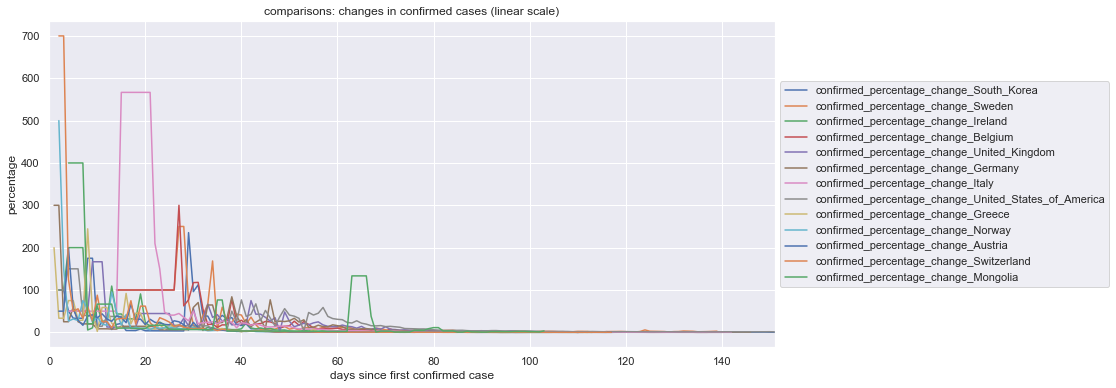

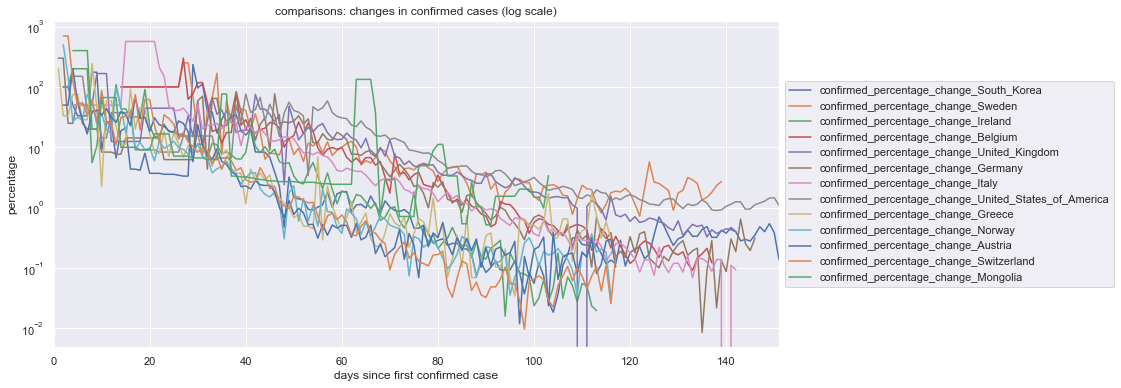

In [31]:
__df = _df[[
    'confirmed_percentage_change_South_Korea',
    'confirmed_percentage_change_Sweden',
    'confirmed_percentage_change_Ireland',
    'confirmed_percentage_change_Belgium',
    'confirmed_percentage_change_United_Kingdom',
    'confirmed_percentage_change_Germany',
    'confirmed_percentage_change_Italy',
    'confirmed_percentage_change_United_States_of_America',
    'confirmed_percentage_change_Greece',
    'confirmed_percentage_change_Norway',
    'confirmed_percentage_change_Austria',
    'confirmed_percentage_change_Switzerland',
    'confirmed_percentage_change_Mongolia']]
display(__df.tail())

title = 'comparisons: changes in confirmed cases'
__df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
__df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_South_Korea  deaths_percentage_change_Sweden  \
147                              0.358423                              NaN   
148                                   NaN                              NaN   
149                                   NaN                              NaN   
150                                   NaN                              NaN   
151                                   NaN                              NaN   

     deaths_percentage_change_Ireland  deaths_percentage_change_Belgium  \
147                               NaN                               NaN   
148                               NaN                               NaN   
149                               NaN                               NaN   
150                               NaN                               NaN   
151                               NaN                               NaN   

     deaths_percentage_change_United_Kingdom  \
147                                      NaN   
148                                      NaN   
149                                      NaN   
150                                      NaN   
151                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
147                               NaN                             NaN   
148                               NaN                             NaN   
149                               NaN                             NaN   
150                               NaN                             NaN   
151                               NaN                             NaN   

     deaths_percentage_change_United_States_of_America  \
147                                           0.644648   
148                                           0.607389   
149                                           0.584302   
150                                           0.499480   
151                                           0.208822   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
147                              NaN                              NaN   
148                              NaN                              NaN   
149                              NaN                              NaN   
150                              NaN                              NaN   
151                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  \
147                               NaN                                   NaN   
148                               NaN                                   NaN   
149                               NaN                                   NaN   
150                               NaN                                   NaN   
151                               NaN                                   NaN   

     deaths_percentage_change_Mongolia  
147                                NaN  
148                                NaN  
149                                NaN  
150                                NaN  
151                                NaN

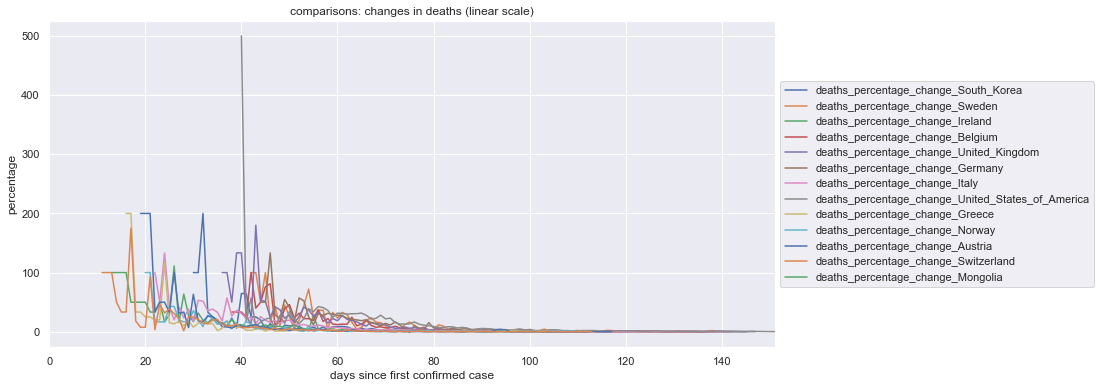

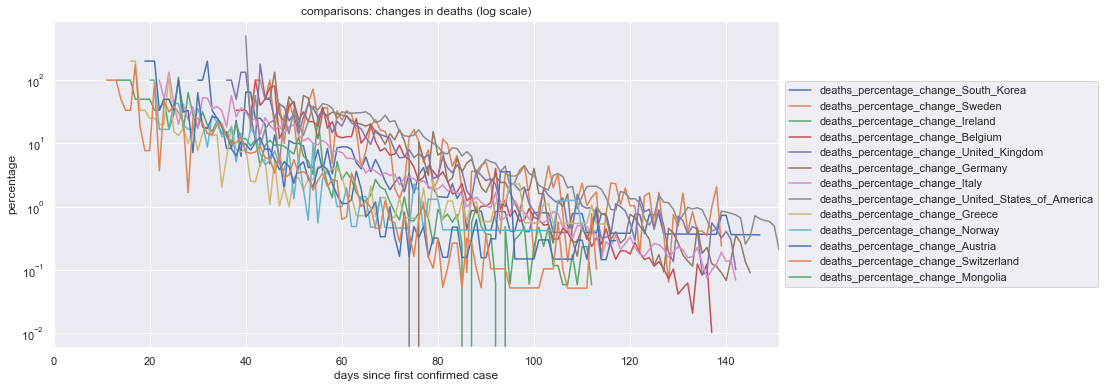

In [32]:
___df = _df[[
    'deaths_percentage_change_South_Korea',
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_United_States_of_America',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland',
    'deaths_percentage_change_Mongolia']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');

deaths_percentage_change_Sweden  deaths_percentage_change_Belgium  \
147                              NaN                               NaN   
148                              NaN                               NaN   
149                              NaN                               NaN   
150                              NaN                               NaN   
151                              NaN                               NaN   

     deaths_percentage_change_Ireland  \
147                               NaN   
148                               NaN   
149                               NaN   
150                               NaN   
151                               NaN   

     deaths_percentage_change_United_Kingdom  \
147                                      NaN   
148                                      NaN   
149                                      NaN   
150                                      NaN   
151                                      NaN   

     deaths_percentage_change_Germany  deaths_percentage_change_Italy  \
147                               NaN                             NaN   
148                               NaN                             NaN   
149                               NaN                             NaN   
150                               NaN                             NaN   
151                               NaN                             NaN   

     deaths_percentage_change_Greece  deaths_percentage_change_Norway  \
147                              NaN                              NaN   
148                              NaN                              NaN   
149                              NaN                              NaN   
150                              NaN                              NaN   
151                              NaN                              NaN   

     deaths_percentage_change_Austria  deaths_percentage_change_Switzerland  
147                               NaN                                   NaN  
148                               NaN                                   NaN  
149                               NaN                                   NaN  
150                               NaN                                   NaN  
151                               NaN                                   NaN

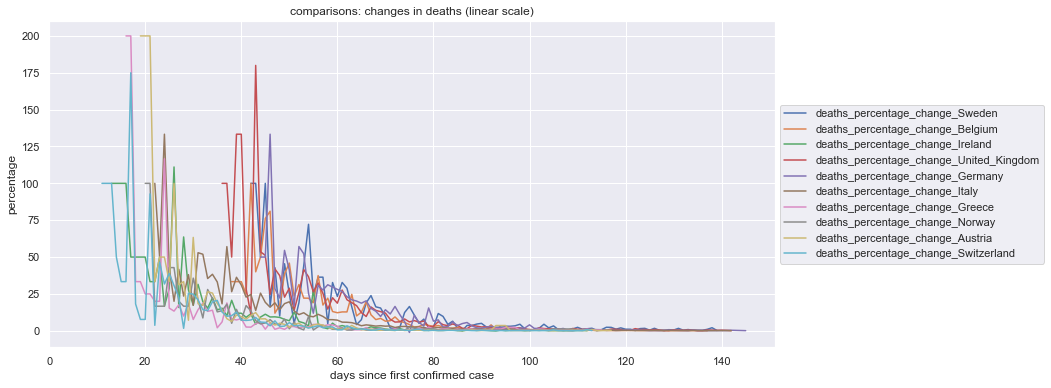

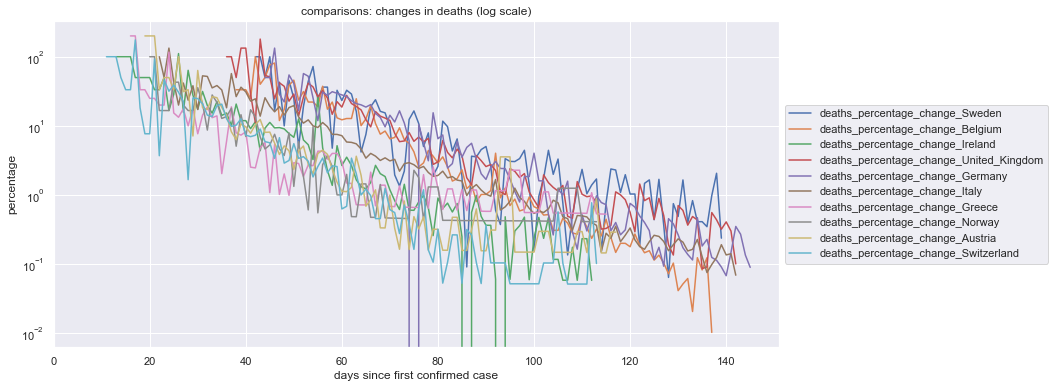

In [33]:
# some European countries
___df = _df[[
    'deaths_percentage_change_Sweden',
    'deaths_percentage_change_Belgium',
    'deaths_percentage_change_Ireland',
    'deaths_percentage_change_United_Kingdom',
    'deaths_percentage_change_Germany',
    'deaths_percentage_change_Italy',
    'deaths_percentage_change_Greece',
    'deaths_percentage_change_Norway',
    'deaths_percentage_change_Austria',
    'deaths_percentage_change_Switzerland']]
display(___df.tail())

title = 'comparisons: changes in deaths'
___df.plot(title=title+' '+'(linear scale)').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))        ; plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');
___df.plot(title=title+' '+'(log scale)', logy=True).legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('days since first confirmed case'); plt.ylabel('percentage');